In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
market = pd.read_csv('Insurance_Marketing-Customer-Value-Analysis.csv')

In [3]:
market.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
market.shape

(9134, 24)

In [5]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               

In [6]:
for i in market.columns:
    print(market[i].value_counts())
    

DB91647    1
KK27683    1
LZ78622    1
RZ98310    1
TO60700    1
          ..
BC87161    1
YU80673    1
RT22532    1
TS76653    1
MZ79386    1
Name: Customer, Length: 9134, dtype: int64
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
2300.691547     6
6057.072080     6
6005.214792     6
8819.018934     6
4984.618655     6
               ..
12206.892080    1
3728.830130     1
2456.816647     1
2675.029491     1
4491.909095     1
Name: Customer Lifetime Value, Length: 8041, dtype: int64
No     7826
Yes    1308
Name: Response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
1/10/2011    195
1/27/2011    194
2/14/2011    186
1/26/2011    181
1/17/2011    180
1/19/2011    179
1/31/2011    178
1/3/2011  

In [7]:
market.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [8]:
market.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [9]:
market_numeric = market.select_dtypes(exclude='object')
market_numeric.head() # numerical columns

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [10]:
market.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [11]:
## Dataset has no missing values or Flags like 9999, ? ,_,- etc

In [12]:
market_category = market.select_dtypes(include='object')
market_category.head() # categorical columns

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/2011,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/2011,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/2011,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/2011,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/2011,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [13]:
## NOT DROPPING ROWS WITH INCOME = 0:
##market[market['Income']==0].index
##market_updated=market.drop(market[market['Income']==0].index,axis=False)

# WE ARE NOT DROPPING THE VALUES WITH 0 SALARY AS THEY ARE STILL CONTRIBUTING TO THE CUSTOMER LIFETIME VALUE

In [14]:
market_updated = market

In [15]:
market_updated.shape

(9134, 24)

## UNIVARIATE ANALYSIS :

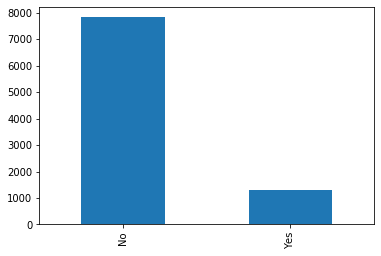

In [16]:
#RESPONSE :
market_updated['Response'].value_counts().plot.bar()
plt.show()

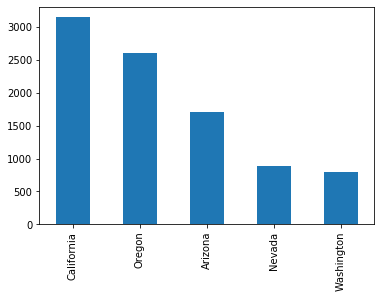

In [17]:
##STATE :
market_updated['State'].value_counts().plot.bar()
plt.show()

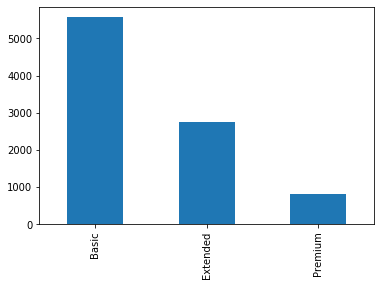

In [18]:
#COVERAGE:
market_updated['Coverage'].value_counts().plot.bar()
plt.show()

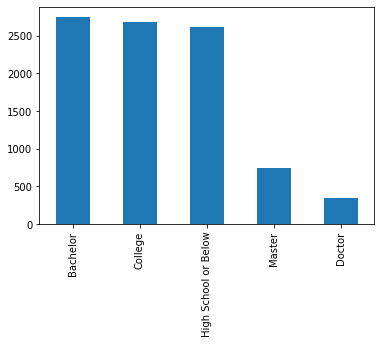

In [19]:
#EDUCATION:
market_updated['Education'].value_counts().plot.bar()
plt.show()

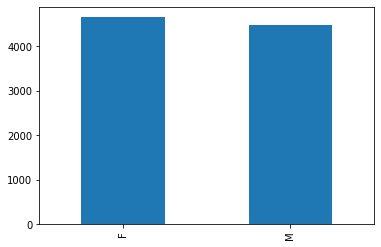

In [20]:
#GENDER :
market_updated['Gender'].value_counts().plot.bar()

In [21]:
## CONVERTING THE DATE COLUMN TO DATE_TYPE :
market_updated['Effective To Date'] = pd.to_datetime(market['Effective To Date'])
market_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null datetime64[ns]
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies       

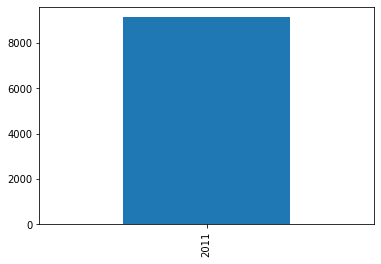

In [22]:
##EFFECTIVE TO DATE :
(market_updated['Effective To Date'].dt.year).value_counts().plot.bar()
plt.show()

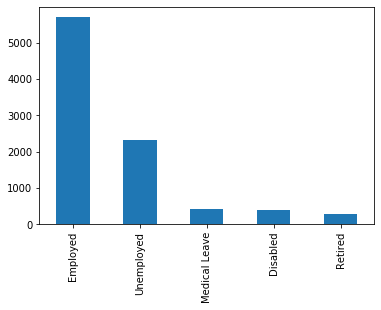

In [23]:
##EMPLOYEMENT STATUS :
market_updated['EmploymentStatus'].value_counts().plot.bar()
plt.show()

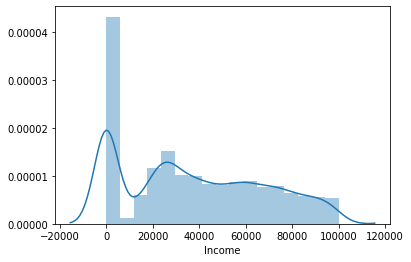

In [24]:
##INCOME :
sns.distplot(market_updated['Income'])
plt.show()

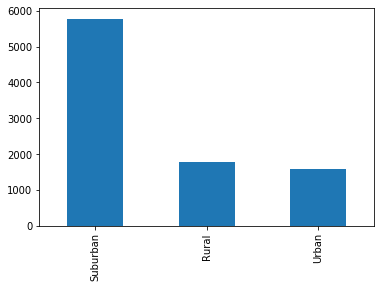

In [25]:
##LOCATION CODE :
market_updated['Location Code'].value_counts().plot.bar()
plt.show()

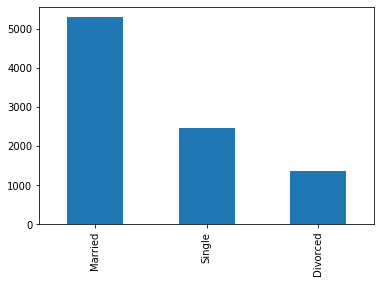

In [26]:
##MARITAL STATUS :
market_updated['Marital Status'].value_counts().plot.bar()
plt.show()

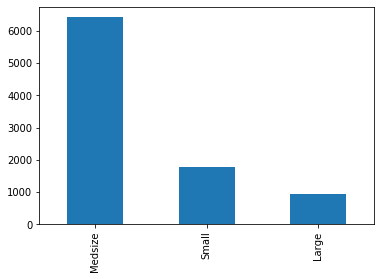

In [27]:
##VEHICLE SIZE :
market_updated['Vehicle Size'].value_counts().plot.bar()
plt.show()

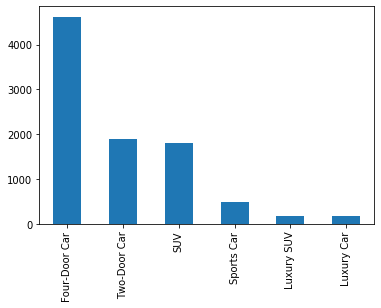

In [28]:
##VEHICLE CLASS :
market_updated['Vehicle Class'].value_counts().plot.bar()
plt.show()

## 

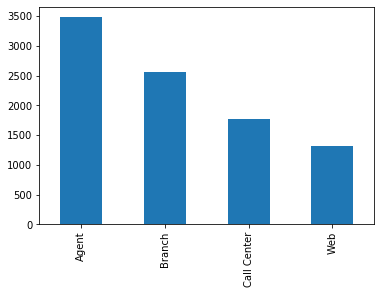

In [29]:
##SALES CHANNEL :
market_updated['Sales Channel'].value_counts().plot.bar()
plt.show()

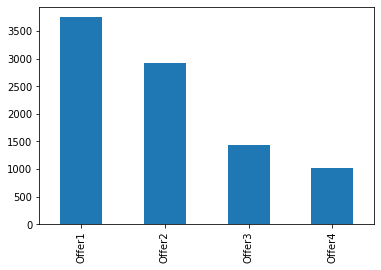

In [30]:
##RENEW OFFER TYPE :
market_updated['Renew Offer Type'].value_counts().plot.bar()
plt.show()

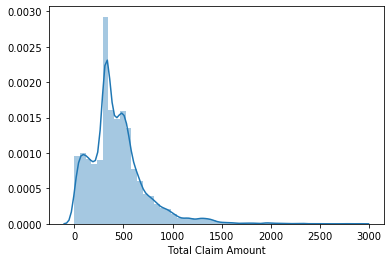

In [31]:
##TOTAL CLAIM AMOUNT :
sns.distplot(market_updated['Total Claim Amount'])
plt.show()

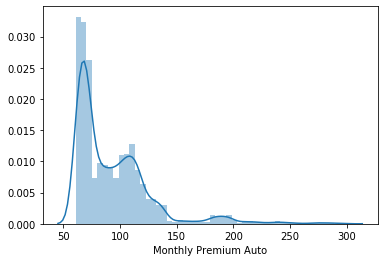

In [32]:
##MONTHLY PREMIUM AUTO :
sns.distplot(market_updated['Monthly Premium Auto'])
plt.show()

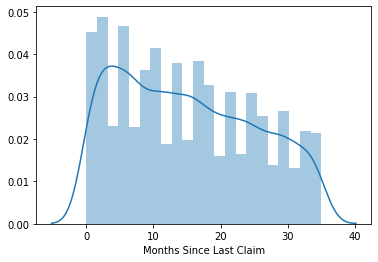

In [33]:
##MONTH SINCE LAST CLAIM :
sns.distplot(market_updated['Months Since Last Claim'])
plt.show()

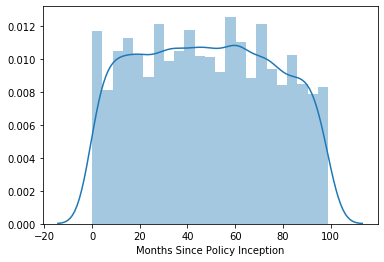

In [34]:
##MONTHS SINCE POLICY INCEPTION :
sns.distplot(market_updated['Months Since Policy Inception'])
plt.show()

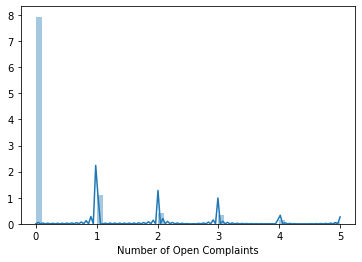

In [35]:
## NUMBER OF OPEN COMPLAINTS :
sns.distplot(market_updated['Number of Open Complaints'])
plt.show()

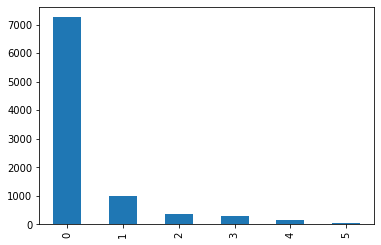

In [36]:
market_updated['Number of Open Complaints'].value_counts().plot.bar()
plt.show()

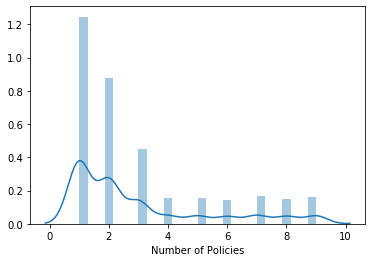

In [37]:
## NUMBER OF POLICIES :
sns.distplot(market_updated['Number of Policies'])
plt.show()

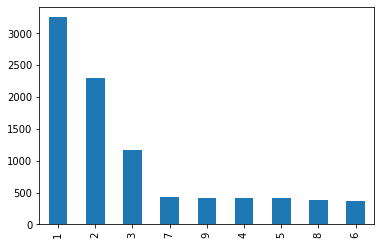

In [38]:
market_updated['Number of Policies'].value_counts().plot.bar()
plt.show()

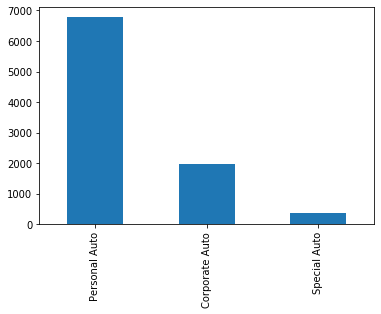

In [39]:
## POLICY TYPES :
market_updated['Policy Type'].value_counts().plot.bar()
plt.show()

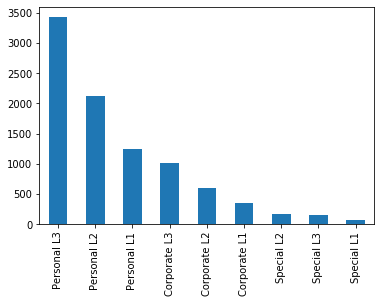

In [40]:
## POLICY :
market_updated['Policy'].value_counts().plot.bar()
plt.show()

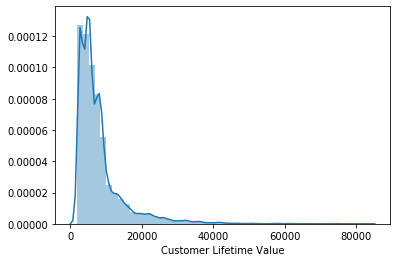

In [41]:
## CUSTOMER LIFE-TIME VALUE :
sns.distplot(market_updated['Customer Lifetime Value'])
plt.show()

## MULTI-VARIATE ANALYSIS :

In [42]:
## CLV(CUSTOMER LIFETIME VALUE) is our target variable here :
## CLV is the net profit attributed to the entire future relationship  with the customer
## CLV higher the more strong the relationship


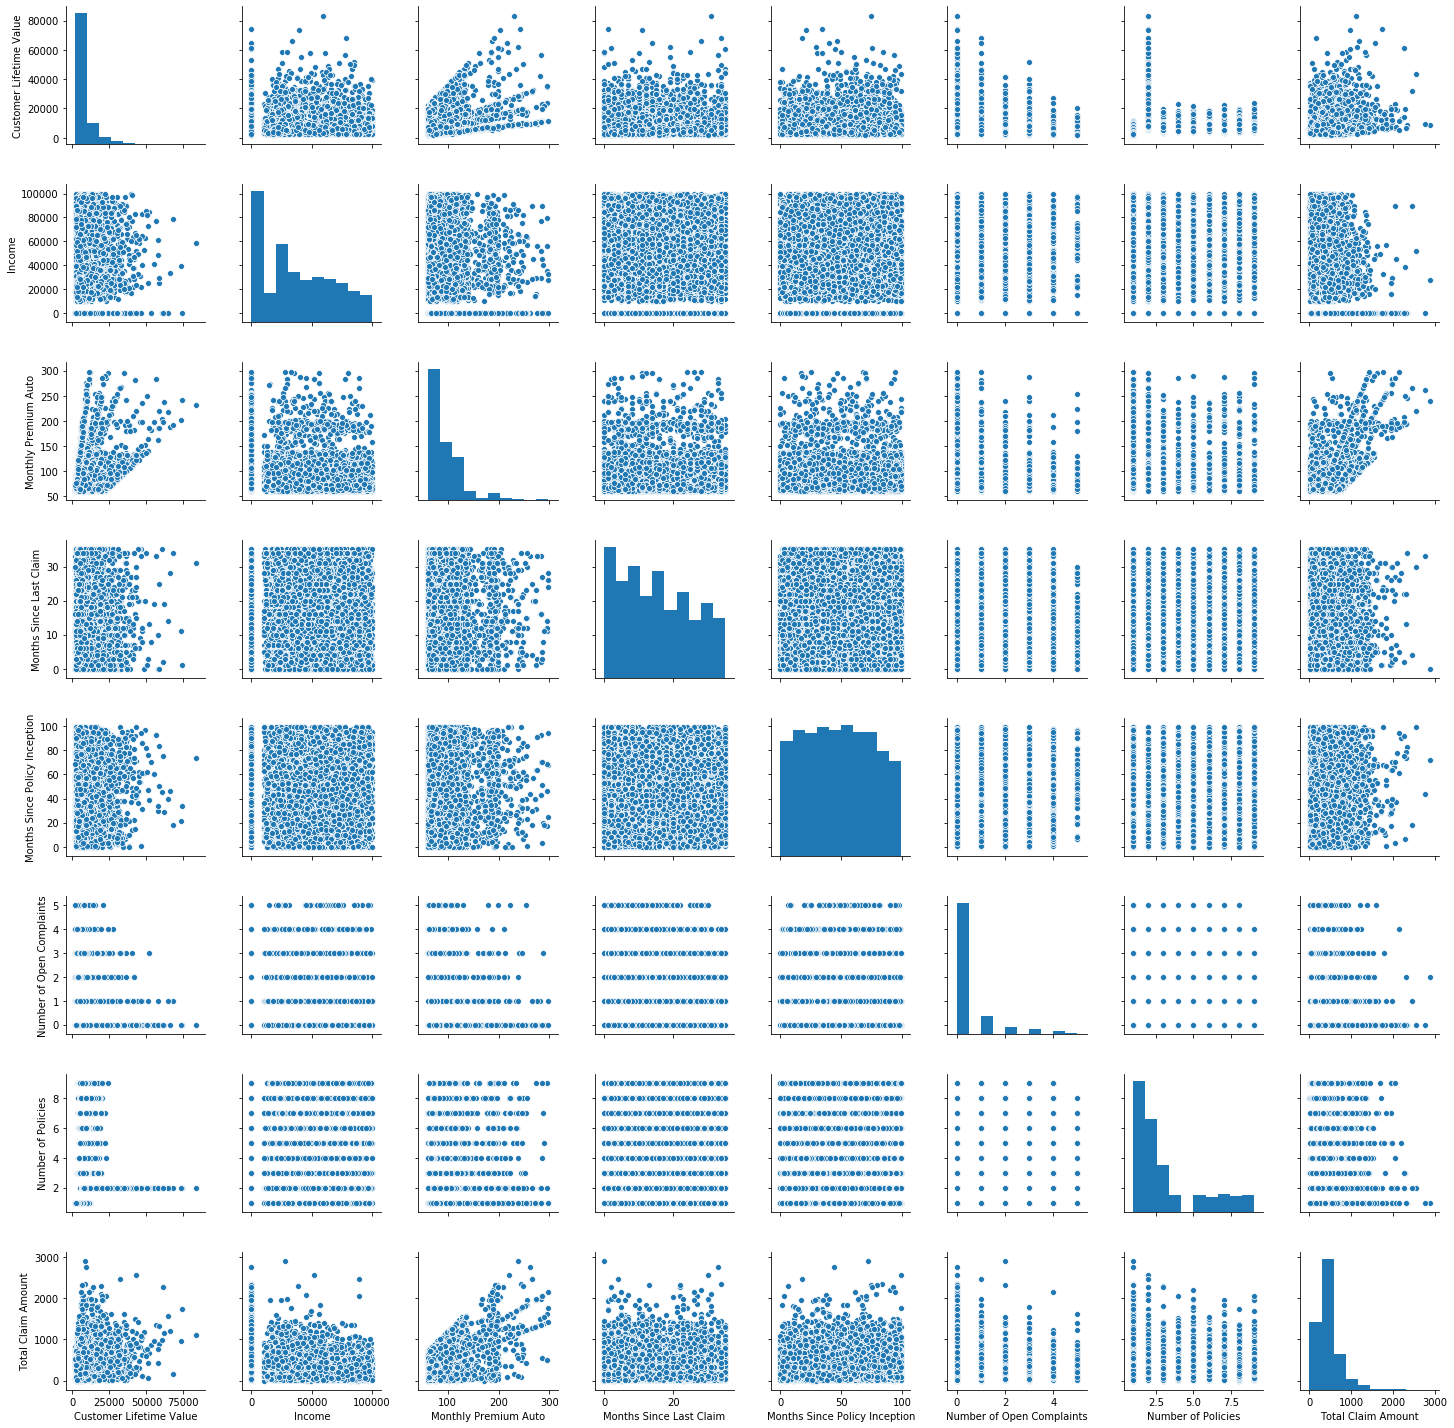

In [43]:
sns.pairplot(market_updated)
plt.show()

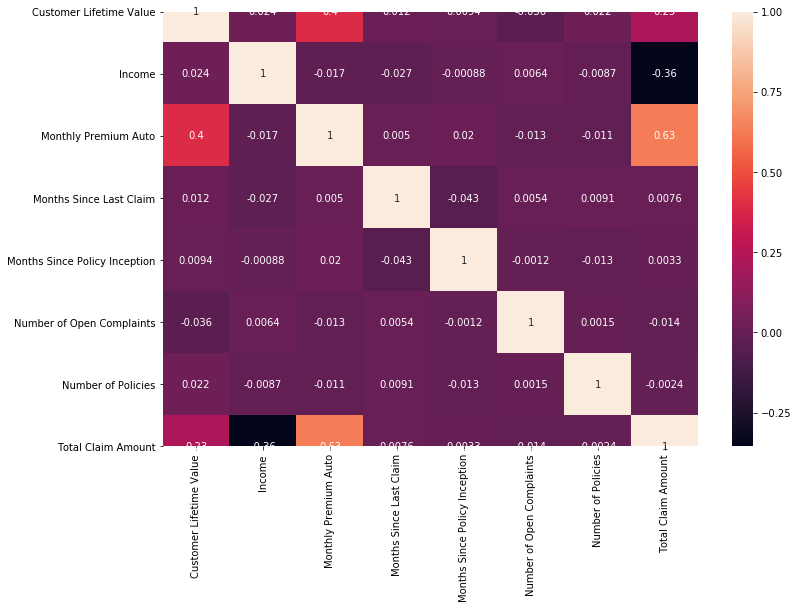

In [44]:
plt.figure(figsize=(12,8))
sns.heatmap(market_updated.corr(),annot=True)
plt.show()

## BIVARIATE ANALYSIS :

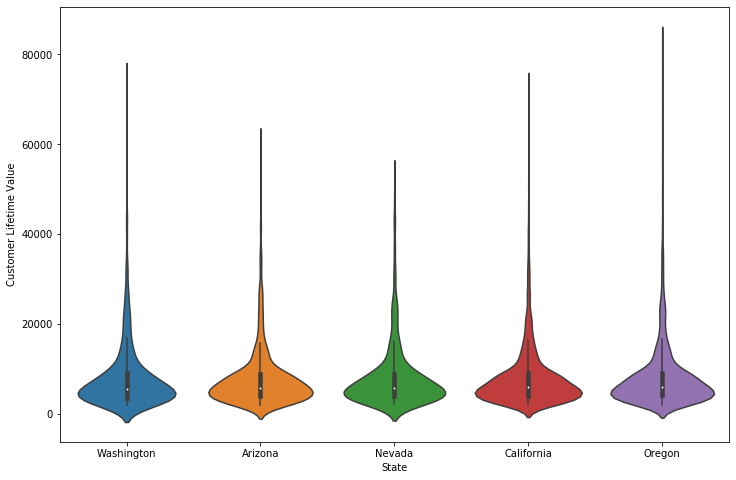

In [45]:
## CLV v/s STATE :
plt.figure(figsize=(12,8))
sns.violinplot(x='State',y='Customer Lifetime Value',data=market_updated,orient='v')
plt.show()

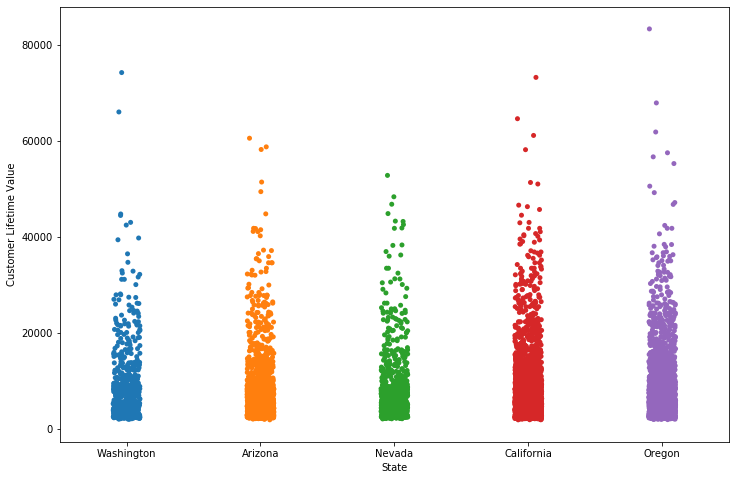

In [46]:
plt.figure(figsize=(12,8))
sns.stripplot(x='State',y='Customer Lifetime Value',data=market_updated)
plt.show()

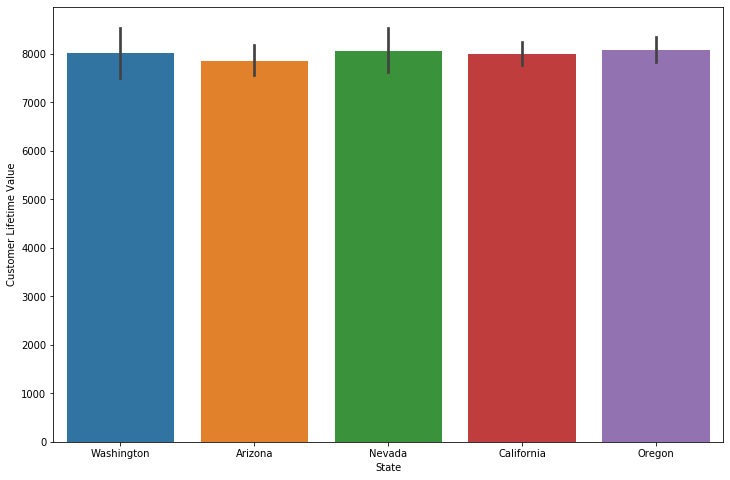

In [47]:
plt.figure(figsize=(12,8))
sns.barplot(x='State',y='Customer Lifetime Value',data=market_updated)
plt.show()

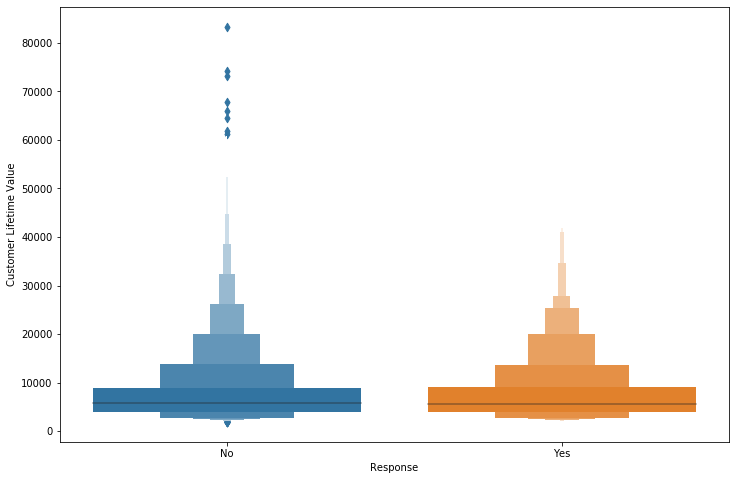

In [48]:
##CLV v/s RESPONSE :
plt.figure(figsize=(12,8))
sns.boxenplot(x='Response',y='Customer Lifetime Value',data=market_updated,orient='v')
plt.show()

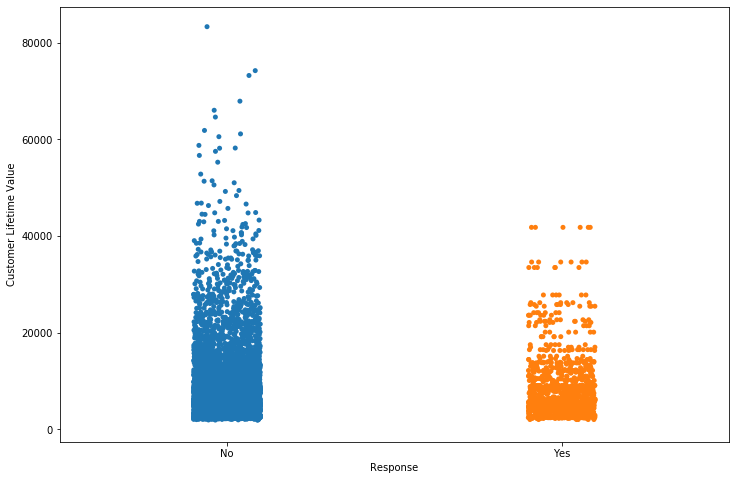

In [49]:
plt.figure(figsize=(12,8))
sns.stripplot(x='Response',y='Customer Lifetime Value',data=market_updated)
plt.show()

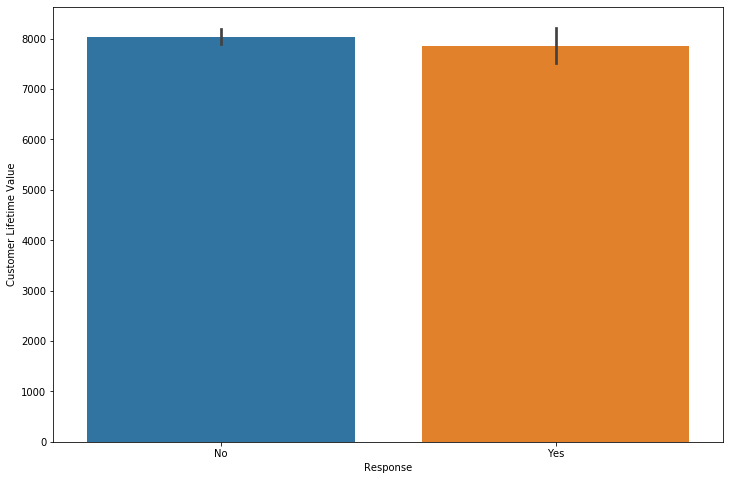

In [50]:
plt.figure(figsize=(12,8))
sns.barplot(x='Response',y='Customer Lifetime Value',data=market_updated)
plt.show()

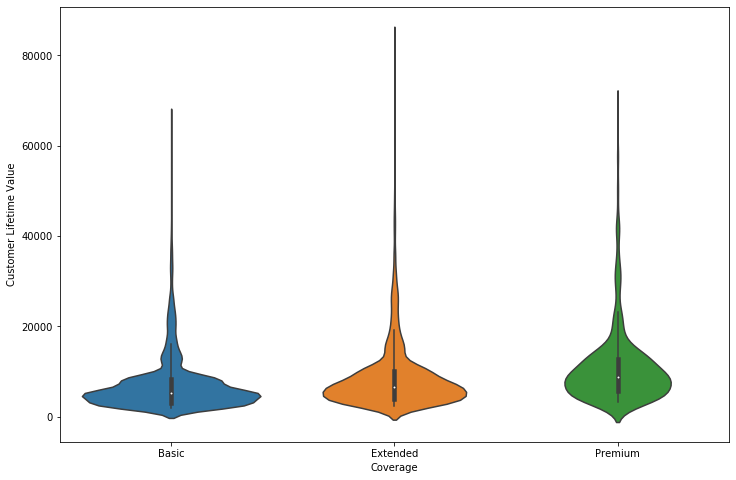

In [51]:
## CLV v/s COVERAGE :
plt.figure(figsize=(12,8))
sns.violinplot(x='Coverage',y='Customer Lifetime Value',data=market_updated,orient='v')
plt.show()

<Figure size 864x576 with 0 Axes>

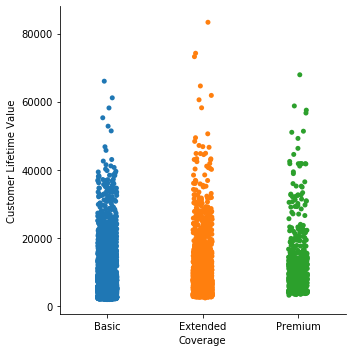

In [52]:
plt.figure(figsize=(12,8))
sns.catplot(x='Coverage',y='Customer Lifetime Value',data=market_updated,kind='strip')
plt.show()

<Figure size 864x576 with 0 Axes>

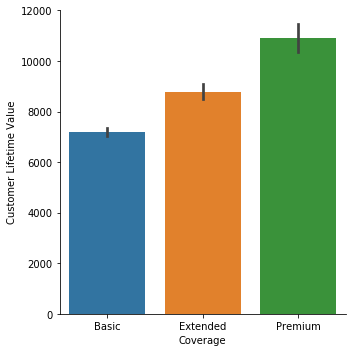

In [53]:
plt.figure(figsize=(12,8))
sns.catplot(x='Coverage',y='Customer Lifetime Value',data=market_updated,kind='bar')
plt.show()

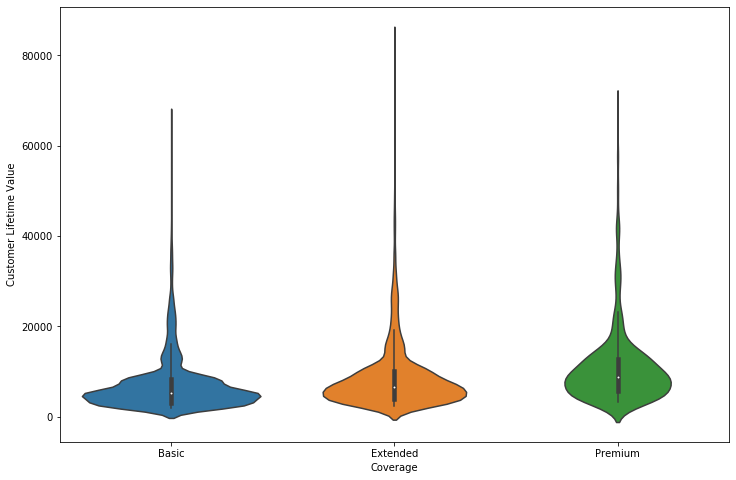

In [54]:
## CLV v/s RESPONSE :
plt.figure(figsize=(12,8))
sns.violinplot(x='Coverage',y='Customer Lifetime Value',data=market_updated)
plt.show()

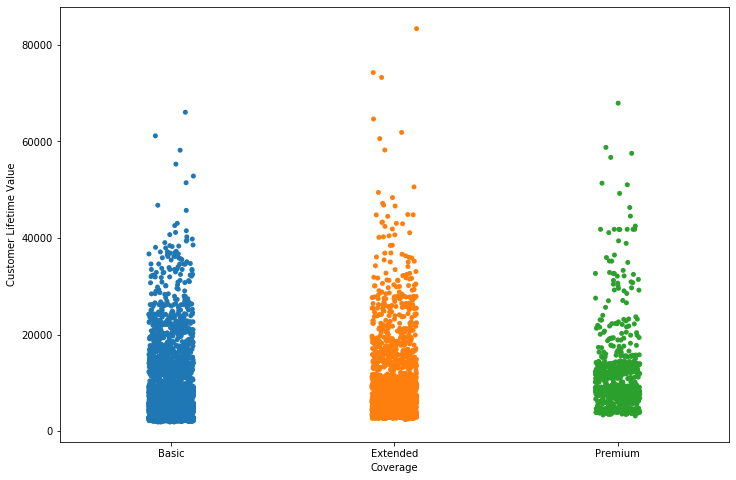

In [55]:
plt.figure(figsize=(12,8))
sns.stripplot(x='Coverage',y='Customer Lifetime Value',data=market_updated)
plt.show()

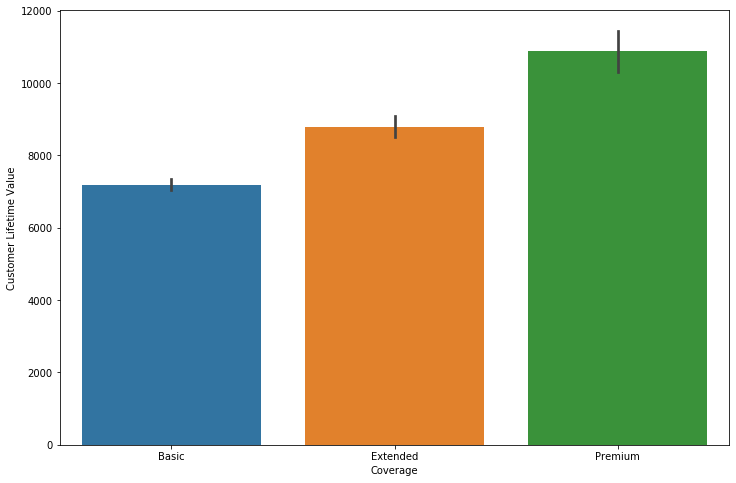

In [56]:
## COVERAGE v/s CLV :
plt.figure(figsize=(12,8))
sns.barplot(x='Coverage',y='Customer Lifetime Value',data=market_updated)
plt.show()

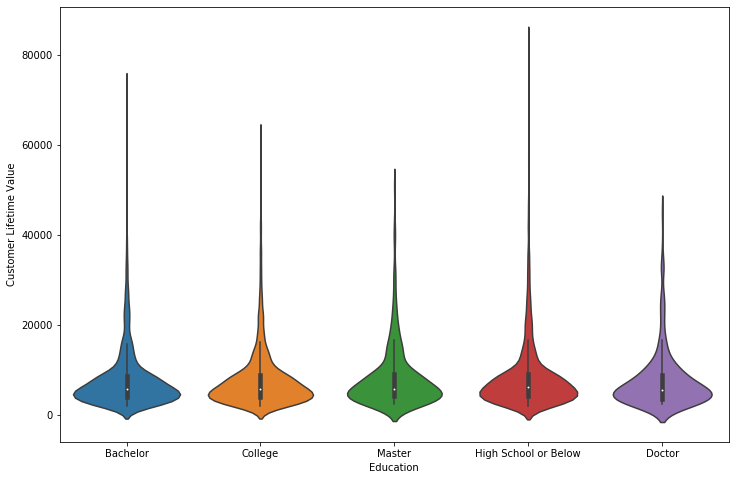

In [57]:
## CLV v/s EDUCATION :
plt.figure(figsize=(12,8))
sns.violinplot(x='Education',y='Customer Lifetime Value',data=market_updated)
plt.show()

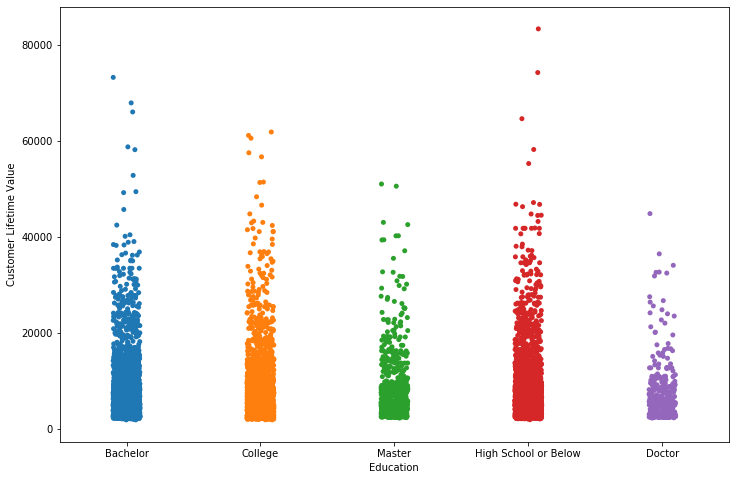

In [58]:
##EDUCATION v/s CLV :
plt.figure(figsize=(12,8))
sns.stripplot(x='Education',y='Customer Lifetime Value',data=market_updated)
plt.show()

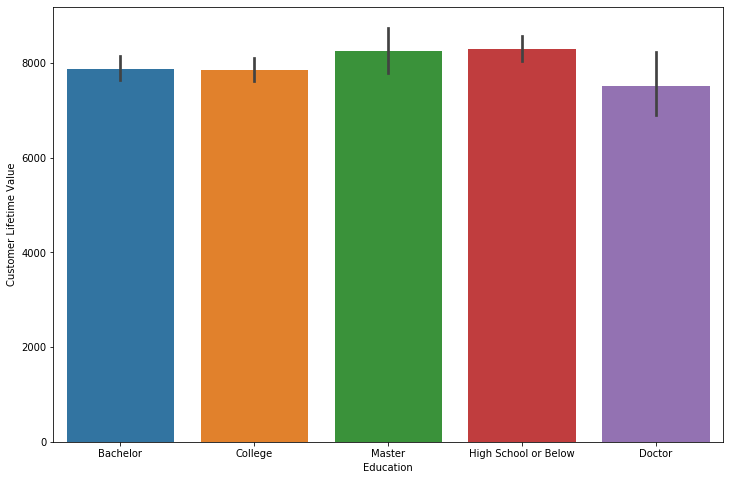

In [59]:
##EDUCATION v/s CLV :
plt.figure(figsize=(12,8))
sns.barplot(x='Education',y='Customer Lifetime Value',data=market_updated)
plt.show()

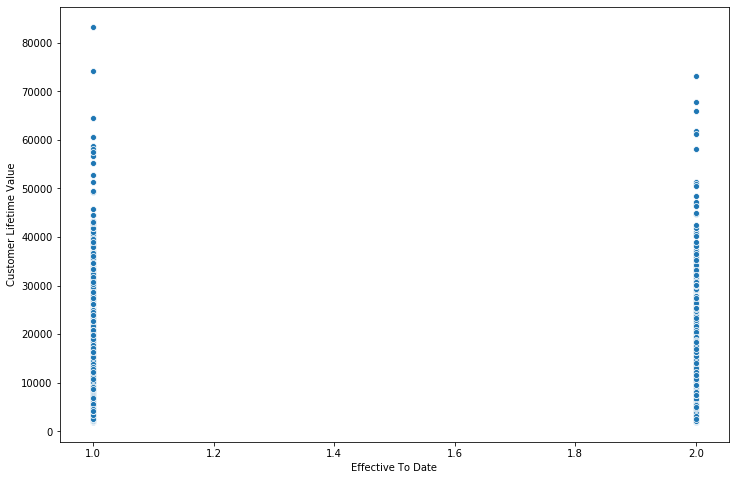

In [60]:
## EFFECTIVE TO DATE v/s CLV :
plt.figure(figsize=(12,8))
sns.scatterplot(x=market_updated['Effective To Date'].dt.month,y=market_updated['Customer Lifetime Value'])
plt.show()

## FINDING OUTLIERS :

In [61]:
market_updated_numeric = market_updated.select_dtypes(exclude='object')
market_updated_numeric=market_updated_numeric.drop('Effective To Date',axis=1)
market_updated_numeric.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [62]:
market_updated_numeric.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

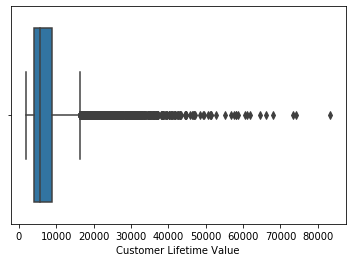

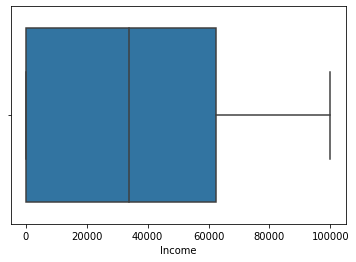

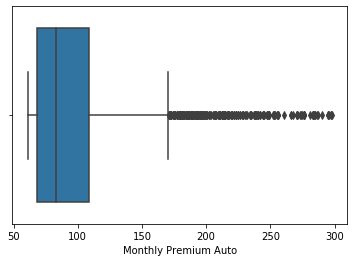

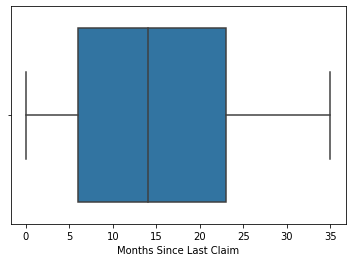

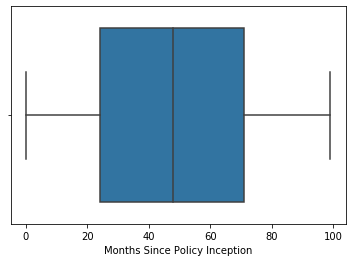

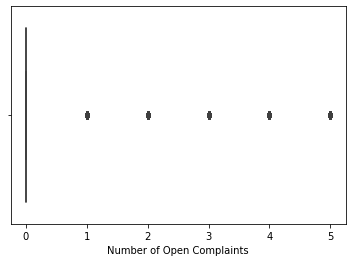

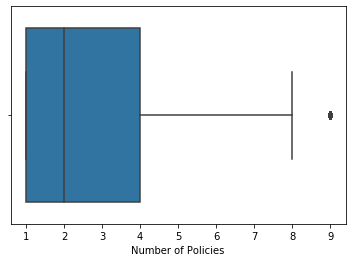

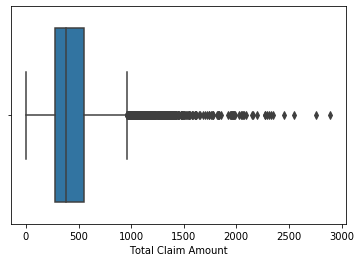

In [63]:
import warnings
warnings.filterwarnings('ignore')
for i,e in enumerate(market_updated_numeric.columns):
    plt.figure(i)
    sns.boxplot(market_updated[e])
    plt.xlabel(e)

In [64]:
## We are retaining the outliers as they are crucial for our model.

## Extracting months from effective to date column:

In [65]:
market_updated['Effective To Date'] = pd.to_datetime(market_updated['Effective To Date'],infer_datetime_format=True)

In [66]:
market_updated['Months'] = market_updated['Effective To Date'].dt.month
market_updated['Months'].value_counts()                                                                                                                                                                                                                                                                                                                                                                                                                                       

1    4898
2    4236
Name: Months, dtype: int64

In [67]:
market_updated['Months'] = market_updated['Months'].astype('object',copy=False)

In [68]:
market_updated = market_updated.drop(columns=['Customer'],axis=1)

In [69]:
market_updated.select_dtypes(include='object')

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Months
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,1
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,1
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,2
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,2
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,2
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,2


## CONVERTING NO. OF OPEN COMPLAINTS & NO. OF POLICIES TO OBJECT-TYPE :

In [70]:
market_updated['Number of Open Complaints'] = market_updated['Number of Open Complaints'].astype('object',copy=False)

In [71]:
market_updated['Number of Policies'] = np.where(market_updated['Number of Policies']>2,3,market_updated['Number of Policies'])

In [72]:
display(market_updated['Number of Open Complaints'].value_counts())
display(market_updated['Number of Policies'].value_counts())

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: Number of Open Complaints, dtype: int64

3    3589
1    3251
2    2294
Name: Number of Policies, dtype: int64

In [73]:
market_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null datetime64[ns]
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null object
Number of Policies               9134 non-null int64
Policy Type              

## DROPPING THE EFFECTIVE TO DATE COLUMN :

In [74]:
market_updated = market_updated.drop('Effective To Date',axis=1)

In [75]:
market_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null object
Number of Policies               9134 non-null int64
Policy Type                      9134 non-null object
Policy                           

## DUMMYFICATION :

In [76]:
market_dummies = pd.get_dummies(data=market_updated,columns=[
'State',
'Response',
'Coverage',
'Education',
'EmploymentStatus',
'Gender',
'Location Code',
'Marital Status',
'Number of Open Complaints',
'Number of Policies',
'Policy Type',
'Policy',
'Renew Offer Type',
'Sales Channel',
'Vehicle Class',
'Vehicle Size',
'Months']
)

In [77]:
market_dummies.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount,State_Arizona,State_California,State_Nevada,State_Oregon,...,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small,Months_1,Months_2
0,2763.519279,56274,69,32,5,384.811147,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1,6979.535903,0,94,13,42,1131.464935,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,12887.431650,48767,108,18,38,566.472247,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1
3,7645.861827,0,106,18,65,529.881344,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
4,2813.692575,43836,73,12,44,138.130879,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [78]:
market_dummies.shape

(9134, 74)

## FITTING BASE MODEL :

In [79]:
X=market_dummies.drop('Customer Lifetime Value',axis=True)
y=market_dummies['Customer Lifetime Value']

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1) # Splitting the data in 70 and 30 ratio
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6393, 73)
(2741, 73)
(6393,)
(2741,)


In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)
print('r2 score for train :',lr.score(X_train,y_train)) # r2 scores of train
print('r2 score for test :',lr.score(X_test,y_test))  #r2 scores of test

r2 score for train : 0.6391982615073131
r2 score for test : 0.6281203595218461


In [84]:
import statsmodels.api as sm

In [85]:
xc=sm.add_constant(X)
model=sm.OLS(y,xc).fit()
prediction = model.predict(xc)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.637
Model:                                 OLS   Adj. R-squared:                  0.635
Method:                      Least Squares   F-statistic:                     295.4
Date:                     Tue, 26 May 2020   Prob (F-statistic):               0.00
Time:                             19:55:55   Log-Likelihood:                -89028.
No. Observations:                     9134   AIC:                         1.782e+05
Df Residuals:                         9079   BIC:                         1.786e+05
Df Model:                               54                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            291.6115    162.958      1.789      0.074     -27.824     611.047
Income                            -0.0001      0.003     -0.042      0.966      -0.005       0.005
Monthly Premium Auto              72.6461      6.630     10.957      0.000      59.650      85.642
Months Since Last Claim            7.0537      4.334      1.627      0.104      -1.442      15.550
Months Since Policy Inception      1.7774      1.575      1.129      0.259      -1.309       4.864
Total Claim Amount                -0.1604      0.314     -0.512      0.609      -0.775       0.454
State_Arizona                     -2.6739     97.986     -0.027      0.978    -194.749     189.401
State_California                 -39.1243     82.646     -0.473      0.636    -201.128     122.880
State_Nevada                     107.1861    124.112      0.864      0.388    -136.100     350.473
State_Oregon                     -13.7706     86.914     -0.158      0.874    -184.142     156.601
State_Washington                 239.9942    129.779      1.849      0.064     -14.402     494.390
Response_No                      237.0669    104.513      2.268      0.023      32.197     441.937
Response_Yes                      54.5445    108.637      0.502      0.616    -158.409     267.498
Coverage_Basic                    70.6566    116.233      0.608      0.543    -157.186     298.499
Coverage_Extended                212.4661     83.019      2.559      0.011      49.729     375.203
Coverage_Premium                   8.4888    240.764      0.035      0.972    -463.464     480.441
Education_Bachelor               -69.8671     92.226     -0.758      0.449    -250.652     110.918
Education_College               -127.9734     92.064     -1.390      0.165    -308.440      52.493
Education_Doctor                 179.2271    189.935      0.944      0.345    -193.089     551.543
Education_High School or Below   126.6206     93.923      1.348      0.178     -57.489     310.731
Education_Master                 183.6043    138.486      1.326      0.185     -87.860     455.068
EmploymentStatus_Disabled       -205.7385    183.570     -1.121      0.262    -565.577     154.100
EmploymentStatus_Employed        468.3786    128.684      3.640      0.000     216.130     720.627
EmploymentStatus_Medical Leave   320.4395    178.592      1.794      0.073     -29.641     670.520
EmploymentStatus_Retired        -132.2725    221.060     -0.598      0.550    -565.601     301.056
EmploymentStatus_Unemployed     -159.1956    128.678     -1.237      0.216    -411.434      93.042
Gender_F                         286.2700     93.566      3.060      0.002     102.860     469.680
Gender_M                           5.3415     91.586      

## ASSUMPTIONS FOR LINEAR REGRESSION :

## 1) LINEARITY :

In [86]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=model,frac=0.5)

(1.0194747909471122, 0.2579646647697516)

In [87]:
model.resid.mean()

1.6490469230992509e-09

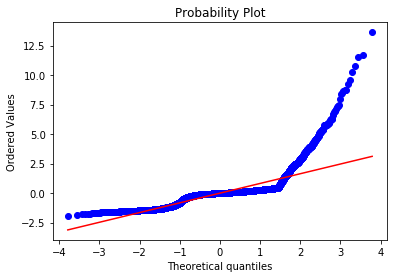

In [88]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
st_residual = model.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

## 2) INDEPENDENCE OF ERRORS ( LITTLE OR NO AUTOCORRELATION AMONG RESIDUALS ):

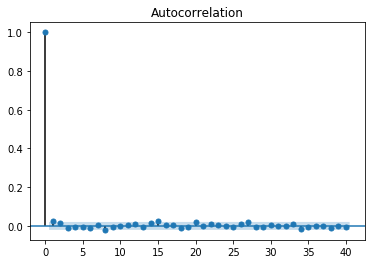

In [89]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(model.resid, lags=40 , alpha=0.05)
acf.show()

## 3) NORMALITY OF RESIDUALS :

In [90]:
from scipy import stats
print(stats.jarque_bera(model.resid))

(243220.22928706056, 0.0)


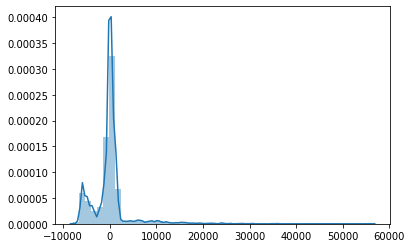

In [91]:
import seaborn as sns
sns.distplot(model.resid)
plt.show()

## 4)EQUAL VARIANCE (HOMOSCEDASTICITY):

This test is based on the hytpothesis testing where null and alternate hypothesis are:
$$ H_{0} : \sigma_{u_{i}}~is~constant~across~the~range~of~data $$

$$ H_{a} : \sigma_{u_{i}}~is~not~constant~across~the~range~of~data $$

The residuals should be homoscedastic.

[('F statistic', 1.2961555190574954), ('p-value', 1.6656949046871629e-18)]

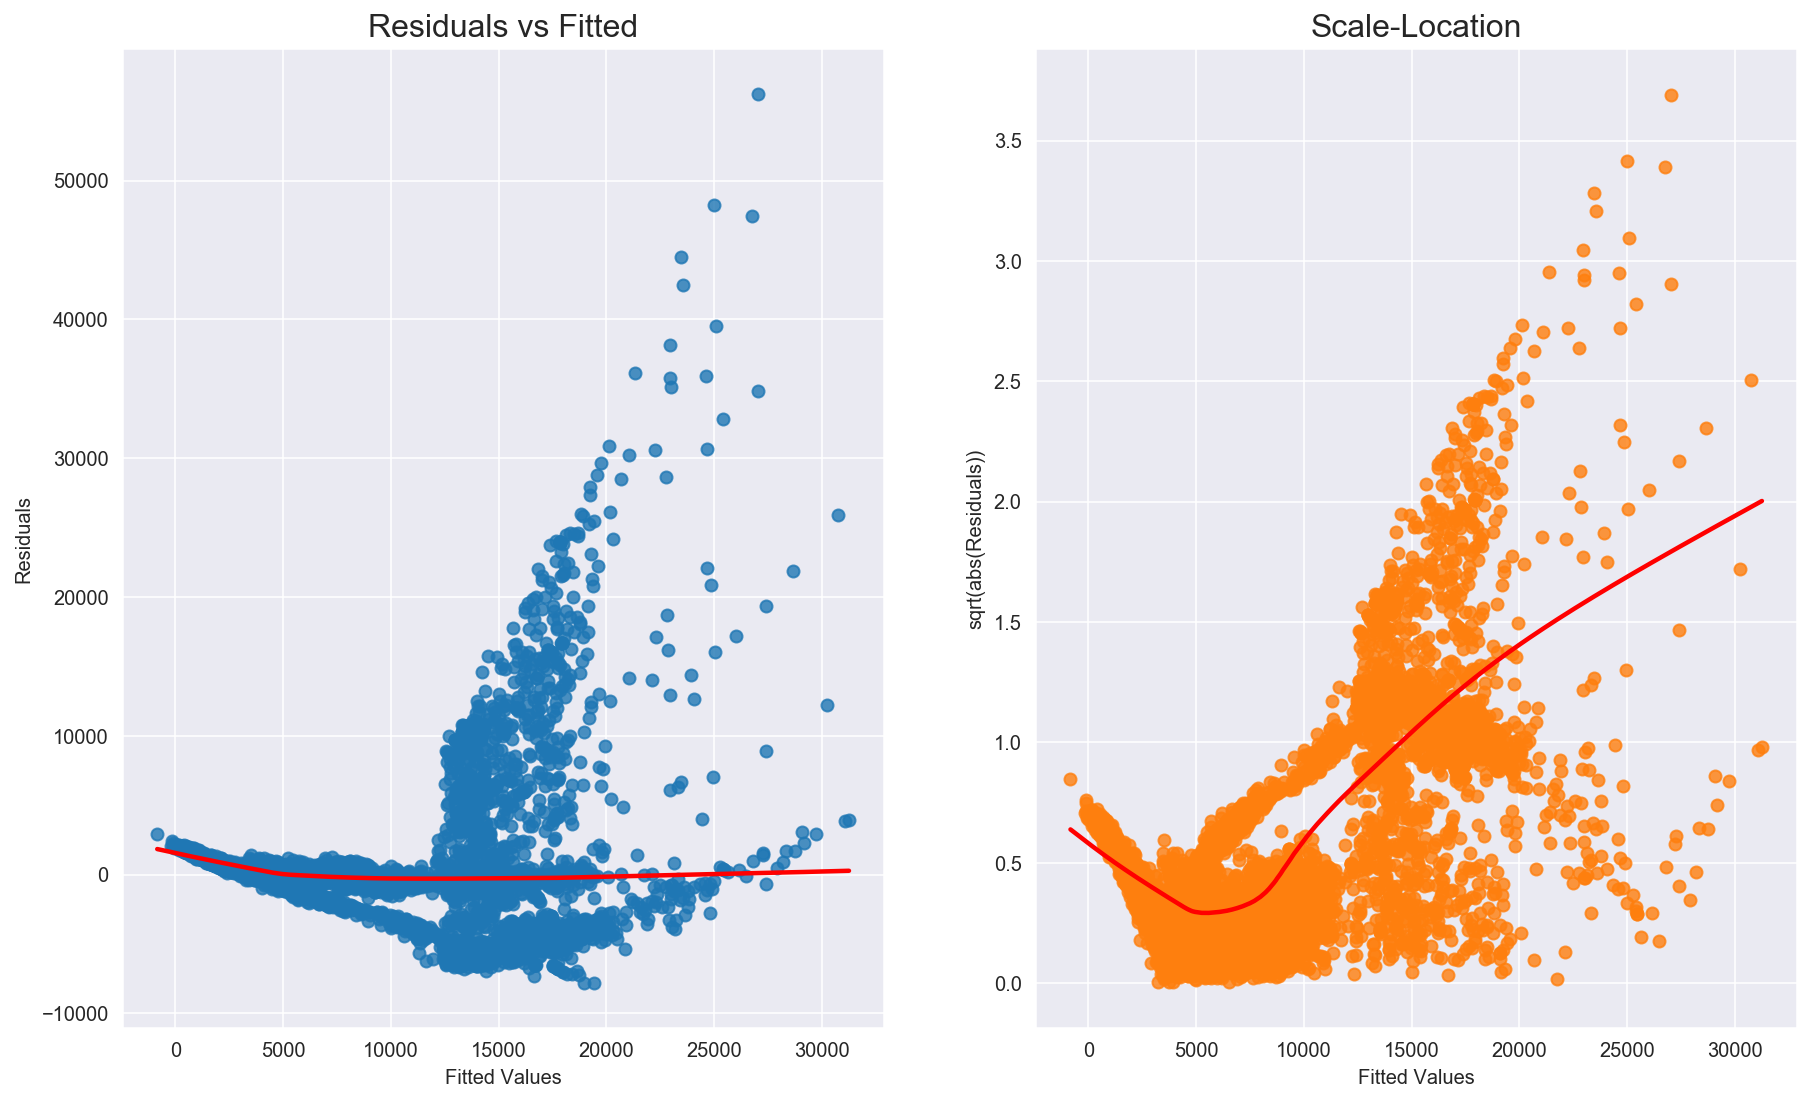

In [92]:
from statsmodels.compat import lzip
import numpy as np
from statsmodels.compat import lzip
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

model = model
fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

We can also use two statistical tests: Breusch-Pagan and Goldfeld-Quandt. In both of them the null hypothesis assumes  homoscedasticity and a p-value below a certain level (like 0.05) indicates we should reject the null in favor of heteroscedasticity.

Here, p value is less than 0.05 so, it is heteroscedasticity distribution.

$$ H_{0} : \sigma_{u_{i}}~is~constant~across~the~range~of~data $$

$$ H_{a} : \sigma_{u_{i}}~is~not~constant~across~the~range~of~data $$

## 5)NO MULTICOLLINEARITY:

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(xc.values, i) for i in range(xc.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns)

,vif
Income,3.185145
Monthly Premium Auto,27.594205
Months Since Last Claim,1.010725
Months Since Policy Inception,1.023772
Total Claim Amount,4.400539
...,...
Vehicle Size_Large,inf
Vehicle Size_Medsize,inf
Vehicle Size_Small,inf
Months_1,inf


## STATISTICAL TESTS FOR CATEGORICAL VARIABLES w.r.t CLV :

### ASSUMPTIONS FOR PERFORMING ANOVA :

### 1) STATE v/s CLV :

In [94]:
market = pd.read_csv('Insurance_Marketing-Customer-Value-Analysis.csv')

In [95]:
State = market.groupby('State')
Washington = State.get_group('Washington')['Customer Lifetime Value']
Arizona = State.get_group('Arizona')['Customer Lifetime Value']
Nevada = State.get_group('Nevada')['Customer Lifetime Value']
California = State.get_group('California')['Customer Lifetime Value']
Oregon = State.get_group('Oregon')['Customer Lifetime Value']

In [96]:
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel,levene,shapiro,chi2_contingency,f_oneway,chisquare,kruskal,normaltest,f_oneway

In [97]:
for i in [Washington,Arizona,Nevada,California,Oregon]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=589.985409403956, pvalue=7.69655090624974e-129) 

NormaltestResult(statistic=1123.931182802557, pvalue=8.73865582665683e-245) 

NormaltestResult(statistic=531.43144944664, pvalue=3.9914160352323387e-116) 

NormaltestResult(statistic=2047.3388756109375, pvalue=0.0) 

NormaltestResult(statistic=1836.7206700158117, pvalue=0.0) 



ALL STATES HAVE SAME MEAN VALUE FOR CLV

pvalue > 0.05 implies that there is no significant difference(H0) in the mean of target variable which means 'State' feature is not significant for predicting 'Customer Lifetime Value'. We fail to reject the H0.

In [98]:
clv=market['Customer Lifetime Value']
for i in [Washington,Arizona,Nevada,California,Oregon]:
    print(levene(i,clv),'\n')

LeveneResult(statistic=1.0415349189685834, pvalue=0.3074896215308519) 

LeveneResult(statistic=0.7811927499549846, pvalue=0.3767962134673002) 

LeveneResult(statistic=0.18915696383936934, pvalue=0.6636285694388174) 

LeveneResult(statistic=0.1377091560403808, pvalue=0.7105755267376663) 

LeveneResult(statistic=0.07863007833900977, pvalue=0.7791674852037898) 



As p > 0.05 we fail to reject H0 and we conclude that population variances are equal.

In [99]:
clv=market['Customer Lifetime Value']
for i in [Washington,Arizona,Nevada,California,Oregon]:
    print(ttest_ind(i,clv),'\n')

Ttest_indResult(statistic=0.06475775410071534, pvalue=0.9483681816925198) 

Ttest_indResult(statistic=-0.7948166233331803, pvalue=0.4267375890060138) 

Ttest_indResult(statistic=0.21306007695083337, pvalue=0.8312844406645747) 

Ttest_indResult(statistic=-0.009154608080629947, pvalue=0.9926959302604222) 

Ttest_indResult(statistic=0.4771950027756301, pvalue=0.633232157394021) 



As p > 0.05 then we fail to reject H0 and we conclude that randomness is present.

In [100]:
f_oneway(Washington,Arizona,Nevada,California,Oregon)

F_onewayResult(statistic=0.27289285462119284, pvalue=0.8955985932127517)

MEANS ARE NOT SAME FOR Employment Status

pvalue < 0.05 implies that there is significant difference in the mean of target variable for atleast one group of 'Employment Status' which means 'Employment Status' feature can be a significant for predicting 'Customer Lifetime Value'

In [101]:
for i in [Washington,Arizona,Nevada,California,Oregon]:
    print(kruskal(i,clv),'\n')

KruskalResult(statistic=2.6717221571368746, pvalue=0.10214544088663126) 

KruskalResult(statistic=0.35477043652382745, pvalue=0.5514250447895894) 

KruskalResult(statistic=0.2564954702086677, pvalue=0.612538101720971) 

KruskalResult(statistic=0.4279956588997593, pvalue=0.5129740902870791) 

KruskalResult(statistic=0.6921349751577665, pvalue=0.40543914451487106) 



As p>0.05 the Kruscal value test passes and we fail to reject the null hypthesis. Hence mean ranks of the groups are same.
So, this is not a significant feature for predicting CLV.

### 2)Gender v/s CLV :

In [102]:
g = market[['Customer Lifetime Value','Gender']].groupby('Gender')
f = g['Customer Lifetime Value'].get_group('F')
m = g['Customer Lifetime Value'].get_group('M')

In [103]:
for i in [f,m]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=2834.0749107540296, pvalue=0.0) 

NormaltestResult(statistic=3243.1471942337193, pvalue=0.0) 



As p<0.05 we reject the H0 and we conclude that there is no normality.

In [104]:
print(kruskal(f,m),'\n')

KruskalResult(statistic=0.4820603496792097, pvalue=0.48749054213997434) 



As p>0.05 the Kruscal value test passes and we fail to reject the null hypthesis. Hence mean ranks of the groups are same.
So, this is not a significant feature for predicting CLV.

### 3) Location Code v/s CLV :

In [105]:
location = market[['Customer Lifetime Value','Location Code']].groupby('Location Code')
sub = location['Customer Lifetime Value'].get_group('Suburban')
urban = location['Customer Lifetime Value'].get_group('Urban')
rural = location['Customer Lifetime Value'].get_group('Rural')

In [106]:
for i in [sub,urban,rural]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=4001.809435806882, pvalue=0.0) 

NormaltestResult(statistic=941.3620057193798, pvalue=3.8533434657380165e-205) 

NormaltestResult(statistic=1122.9340758970607, pvalue=1.4386781520042673e-244) 



As p<0.05 we reject H0 and we conclude that there is no normality.

In [107]:
for i in [sub,urban,rural]:
    print(kruskal(i,clv),'\n')

KruskalResult(statistic=0.5439891545613237, pvalue=0.4607841772827237) 

KruskalResult(statistic=0.861018389353863, pvalue=0.35345385943718566) 

KruskalResult(statistic=0.4736358401793317, pvalue=0.4913192501662793) 



As p>0.05 the Kruscal value test passes and we fail to reject the null hypthesis. Hence mean ranks of the groups are same.
So, this is not a significant feature for predicting CLV.

### 4) Marital Status v/s CLV:

In [108]:
MaritalStatus = market[['Customer Lifetime Value','Marital Status']].groupby('Marital Status')
Married = MaritalStatus['Customer Lifetime Value'].get_group('Married')
Single = MaritalStatus['Customer Lifetime Value'].get_group('Single')
Divorced = MaritalStatus['Customer Lifetime Value'].get_group('Divorced')

In [109]:
for i in [Married,Single,Divorced]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=3677.216857754807, pvalue=0.0) 

NormaltestResult(statistic=1721.914498898464, pvalue=0.0) 

NormaltestResult(statistic=680.597010523175, pvalue=1.6226952503119905e-148) 



As p<0.05 we reject H0 and we conclude that there is no normality.

In [110]:
for i in [Married,Single,Divorced]:
    print(kruskal(i,clv),'\n')

KruskalResult(statistic=3.220112325886047, pvalue=0.07273863850018439) 

KruskalResult(statistic=11.951785909985432, pvalue=0.000545950246600058) 

KruskalResult(statistic=0.5467084056565384, pvalue=0.4596657655470481) 



As p<0.05 the Kruscal value test passes and we fail to reject the null hypthesis. Hence mean ranks of the groups are same.
So, this is  marital_status=SINGLE significant feature for predicting CLV.

### 5) Policy v/s CLV:

In [111]:
Policy  = market[['Customer Lifetime Value','Policy']].groupby('Policy')
p3 = Policy['Customer Lifetime Value'].get_group('Personal L3')
p2 = Policy['Customer Lifetime Value'].get_group('Personal L2')
p1 = Policy['Customer Lifetime Value'].get_group('Personal L1')
c3 = Policy['Customer Lifetime Value'].get_group('Corporate L3')
c2 = Policy['Customer Lifetime Value'].get_group('Corporate L2')
c1 = Policy['Customer Lifetime Value'].get_group('Corporate L1')
s3 = Policy['Customer Lifetime Value'].get_group('Special L3')
s2 = Policy['Customer Lifetime Value'].get_group('Special L2')
s1 = Policy['Customer Lifetime Value'].get_group('Special L1')

In [112]:
for i in [p3,p2,p1,c3,c2,c1,s3,s2,s1]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=2454.8806553250483, pvalue=0.0) 

NormaltestResult(statistic=1239.8942061958492, pvalue=5.7596229383194274e-270) 

NormaltestResult(statistic=992.9674497188381, pvalue=2.3980483698011588e-216) 

NormaltestResult(statistic=605.9012411656124, pvalue=2.6928811836326553e-132) 

NormaltestResult(statistic=373.09668872516477, pvalue=9.617970377316392e-82) 

NormaltestResult(statistic=187.8953648881132, pvalue=1.5813934182974064e-41) 

NormaltestResult(statistic=81.04251038237228, pvalue=2.52256560971873e-18) 

NormaltestResult(statistic=98.75159886489641, pvalue=3.6004995993148485e-22) 

NormaltestResult(statistic=19.415176797916622, pvalue=6.0820211456712794e-05) 



As p<0.05 we reject H0 and we conclude that there is no normality.

In [113]:
for i in [p3,p2,p1,c3,c2,c1,s3,s2,s1]:
    print(kruskal(i,clv),'\n')

KruskalResult(statistic=0.12306844431416333, pvalue=0.7257300516489087) 

KruskalResult(statistic=0.010202496159222784, pvalue=0.9195445807461822) 

KruskalResult(statistic=0.053228144165224756, pvalue=0.8175383529831601) 

KruskalResult(statistic=0.810274817782063, pvalue=0.3680390132117678) 

KruskalResult(statistic=0.8033187368086739, pvalue=0.3701029704418932) 

KruskalResult(statistic=1.4684174413305169, pvalue=0.22559555187401226) 

KruskalResult(statistic=2.6484737948151773, pvalue=0.10364936526358644) 

KruskalResult(statistic=1.4413927932730752, pvalue=0.22991408915827258) 

KruskalResult(statistic=0.2595892910029184, pvalue=0.6104024578243759) 



As p>0.05 the Kruscal value test passes and we fail to reject the null hypthesis. Hence mean ranks of the groups are same.
So, this is not a significant feature for predicting CLV.

### 6) Renew Offer Type v/s CLV :

In [114]:
R  = market[['Customer Lifetime Value','Renew Offer Type']].groupby('Renew Offer Type')
o1 = R['Customer Lifetime Value'].get_group('Offer1')
o2 = R['Customer Lifetime Value'].get_group('Offer2')
o3 = R['Customer Lifetime Value'].get_group('Offer3')
o4 = R['Customer Lifetime Value'].get_group('Offer4')

In [115]:
for i in [o1,o2,o3,o4]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=2617.6948383126864, pvalue=0.0) 

NormaltestResult(statistic=1936.9308789084942, pvalue=0.0) 

NormaltestResult(statistic=815.8559270625346, pvalue=6.904566619974463e-178) 

NormaltestResult(statistic=642.2059295134014, pvalue=3.5217156184052177e-140) 



In [116]:
for i in [o1,o2,o3,o4]:
    print(kruskal(i,clv),'\n')

KruskalResult(statistic=61.02801480847301, pvalue=5.626838509360458e-15) 

KruskalResult(statistic=35.509100913485256, pvalue=2.538616890610448e-09) 

KruskalResult(statistic=0.023558333662130507, pvalue=0.8780140499799257) 

KruskalResult(statistic=32.27969014043789, pvalue=1.3350148194988557e-08) 



As p>0.05 the Kruscal value test passes and we reject the null hypthesis. Hence mean ranks of the groups are same.
So, this is a significant feature for predicting CLV.

### 7) Sales Channel v/s CLV :

In [117]:
Sales  = market[['Customer Lifetime Value','Sales Channel']].groupby('Sales Channel')
agent = Sales['Customer Lifetime Value'].get_group('Agent')
branch = Sales['Customer Lifetime Value'].get_group('Branch')
call = Sales['Customer Lifetime Value'].get_group('Call Center')
web = Sales['Customer Lifetime Value'].get_group('Web')

In [118]:
for i in [agent,branch,call,web]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=2249.8117586071908, pvalue=0.0) 

NormaltestResult(statistic=1778.5170859072064, pvalue=0.0) 

NormaltestResult(statistic=1209.3339649106563, pvalue=2.4915300560589623e-263) 

NormaltestResult(statistic=866.0244616685382, pvalue=8.814091447361906e-189) 



As p<0.05 we reject H0 and we conclude that there is no normality.

In [119]:
for i in [agent,branch,call,web]:
    print(kruskal(i,clv),'\n')

KruskalResult(statistic=0.30798562647231187, pvalue=0.5789189239077719) 

KruskalResult(statistic=0.08840902011935729, pvalue=0.7662095847924888) 

KruskalResult(statistic=0.11555618204811054, pvalue=0.7339050597861438) 

KruskalResult(statistic=3.332094787047693, pvalue=0.06794029167154608) 



As p>0.05 the Kruscal value test passes and we fail to reject the null hypthesis. Hence mean ranks of the groups are same.
So, this is not a significant feature for predicting CLV.

### 8) Vehicle Class v/s CLV :

In [120]:
VC  = market[['Customer Lifetime Value','Vehicle Class']].groupby('Vehicle Class')
fd = VC['Customer Lifetime Value'].get_group('Four-Door Car')
td = VC['Customer Lifetime Value'].get_group('Two-Door Car')
suv = VC['Customer Lifetime Value'].get_group('SUV')
sc = VC['Customer Lifetime Value'].get_group('Sports Car')
ls = VC['Customer Lifetime Value'].get_group('Luxury SUV')
lc = VC['Customer Lifetime Value'].get_group('Luxury Car')

In [121]:
for i in [fd,td,suv,sc,ls,lc]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=2591.5563098196517, pvalue=0.0) 

NormaltestResult(statistic=967.8795815175732, pvalue=6.723869874448458e-211) 

NormaltestResult(statistic=911.8062937987764, pvalue=1.0087394816479343e-198) 

NormaltestResult(statistic=256.8651916324882, pvalue=1.6689077848613138e-56) 

NormaltestResult(statistic=93.79133396550114, pvalue=4.300021273979593e-21) 

NormaltestResult(statistic=112.96534867020267, pvalue=2.9504360994555045e-25) 



In [122]:
for i in [fd,td,suv,sc,ls,lc]:
    print(kruskal(i,clv),'\n')

KruskalResult(statistic=159.92216576786683, pvalue=1.1766687071056627e-36) 

KruskalResult(statistic=82.9158277129635, pvalue=8.562283553621442e-20) 

KruskalResult(statistic=340.3359380173568, pvalue=5.3914971929083644e-76) 

KruskalResult(statistic=116.04836431079774, pvalue=4.638456140140547e-27) 

KruskalResult(statistic=225.10056072509892, pvalue=6.980358241241141e-51) 

KruskalResult(statistic=206.9231858865294, pvalue=6.444103873091075e-47) 



As p<0.05 the Kruscal value test passes and we reject the null hypthesis. Hence mean ranks of the groups are not same.
So, this is a significant feature for predicting CLV.

### 9) Vehicle Size v/s CLV :

In [123]:
VS  = market[['Customer Lifetime Value','Vehicle Size']].groupby('Vehicle Size')
m = VS['Customer Lifetime Value'].get_group('Medsize')
s = VS['Customer Lifetime Value'].get_group('Small')
l = VS['Customer Lifetime Value'].get_group('Large')

In [124]:
for i in [m,s,l]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=4107.297603156226, pvalue=0.0) 

NormaltestResult(statistic=1277.51103714535, pvalue=3.908435944085235e-278) 

NormaltestResult(statistic=710.5562496753278, pvalue=5.066065984237427e-155) 



In [125]:
for i in [m,s,l]:
    print(kruskal(i,clv),'\n')

KruskalResult(statistic=0.6420468748221403, pvalue=0.42297056468021343) 

KruskalResult(statistic=0.01496073868950429, pvalue=0.9026502668543007) 

KruskalResult(statistic=7.660308851472484, pvalue=0.005644884070811497) 



As p<0.05 the Kruscal value test passes and we reject the null hypthesis. Hence mean ranks of the groups are not same.
So, Vehicle Size Large is a significant feature for predicting CLV.

### 10) Coverage v/s CLV :

In [126]:
Coverage = market[['Customer Lifetime Value','Coverage']].groupby('Coverage')
basic = Coverage['Customer Lifetime Value'].get_group('Basic')
extended = Coverage['Customer Lifetime Value'].get_group('Extended')
premium = Coverage['Customer Lifetime Value'].get_group('Premium')

In [127]:
for i in [basic,extended,premium]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=3458.849448301252, pvalue=0.0) 

NormaltestResult(statistic=1947.8731066934433, pvalue=0.0) 

NormaltestResult(statistic=503.3468946321326, pvalue=5.007380445967074e-110) 



In [128]:
for i in [basic,extended,premium]:
    print(kruskal(i,clv),'\n')

KruskalResult(statistic=101.4838143017182, pvalue=7.204976632166485e-24) 

KruskalResult(statistic=70.81197387142113, pvalue=3.929449272549717e-17) 

KruskalResult(statistic=226.64762618549608, pvalue=3.209684193492144e-51) 



As p<0.05 the Kruscal value test passes and we reject the null hypthesis. Hence mean ranks of the groups are not same.
So, Coverage is a significant feature for predicting CLV.

### 11)  Customer Response to marketing calls v/s CLV :

In [129]:
Response = market[['Customer Lifetime Value','Response']].groupby('Response')
No = Response['Customer Lifetime Value'].get_group('No')
Yes = Response['Customer Lifetime Value'].get_group('Yes')

In [130]:
for i in [No,Yes]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=5322.477891516728, pvalue=0.0) 

NormaltestResult(statistic=639.4950779413575, pvalue=1.3658664040085885e-139) 



In [131]:
for i in [No,Yes]:
    print(kruskal(i,clv),'\n')

KruskalResult(statistic=0.03240141187987236, pvalue=0.8571494893033809) 

KruskalResult(statistic=0.3148635190825787, pvalue=0.5747109577400776) 



As p>0.05 the Kruscal value test passes and we  reject the null hypthesis. Hence mean ranks of the groups are same.
So, Customer Repsonse  is NOT a significant feature for predicting CLV.

### 12) Education v/s CLV :

In [132]:
Education = market[['Customer Lifetime Value','Education']].groupby('Education')
bachelor = Education['Customer Lifetime Value'].get_group('Bachelor')
college = Education['Customer Lifetime Value'].get_group('College')
highschool = Education['Customer Lifetime Value'].get_group('High School or Below')
master = Education['Customer Lifetime Value'].get_group('Master')
doctor = Education['Customer Lifetime Value'].get_group('Doctor')

In [133]:
for i in [bachelor,college,highschool,master,doctor]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=1877.571113964995, pvalue=0.0) 

NormaltestResult(statistic=1808.0647185961266, pvalue=0.0) 

NormaltestResult(statistic=1797.622885789157, pvalue=0.0) 

NormaltestResult(statistic=420.3468077537673, pvalue=5.282633163257892e-92) 

NormaltestResult(statistic=207.1795478118804, pvalue=1.0269110120928107e-45) 



In [134]:
for i in [bachelor,college,highschool,master,doctor]:
    print(kruskal(i,clv),'\n')

KruskalResult(statistic=1.6230905457556735, pvalue=0.202661393022499) 

KruskalResult(statistic=0.7036960851036674, pvalue=0.4015445361180099) 

KruskalResult(statistic=4.590391214006506, pvalue=0.032151674847802916) 

KruskalResult(statistic=1.0182786708823295, pvalue=0.3129276614801367) 

KruskalResult(statistic=2.124126794301473, pvalue=0.14499539380668477) 



As p<0.05 the Kruscal value test passes and we reject the null hypthesis. Hence mean ranks of the groups are not same.
So, Education-->HIGHSCHOOL is a significant feature for predicting CLV.

### 13) Employment Status v/s CLV :

In [135]:
es = market[['Customer Lifetime Value','EmploymentStatus']].groupby('EmploymentStatus')
employed = es['Customer Lifetime Value'].get_group('Employed')
unemployed = es['Customer Lifetime Value'].get_group('Unemployed')
medleave = es['Customer Lifetime Value'].get_group('Medical Leave')
disabled = es['Customer Lifetime Value'].get_group('Disabled')
retired = es['Customer Lifetime Value'].get_group('Retired')

In [136]:
for i in [employed,unemployed,medleave,disabled,retired]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=3761.129277691408, pvalue=0.0) 

NormaltestResult(statistic=1679.139433825762, pvalue=0.0) 

NormaltestResult(statistic=235.4863106944144, pvalue=7.324826645525092e-52) 

NormaltestResult(statistic=276.0845869374091, pvalue=1.119421586116707e-60) 

NormaltestResult(statistic=99.68654915712415, pvalue=2.256009325581312e-22) 



In [137]:
for i in [employed,unemployed,medleave,disabled,retired]:
    print(kruskal(i,clv),'\n')

KruskalResult(statistic=9.334943942799404, pvalue=0.0022482496860621276) 

KruskalResult(statistic=15.09979242007114, pvalue=0.00010197450132025993) 

KruskalResult(statistic=4.846002655418614, pvalue=0.027710278358064923) 

KruskalResult(statistic=0.12508102632687565, pvalue=0.7235877364338822) 

KruskalResult(statistic=3.1705567748502137, pvalue=0.07497688262827977) 



As p<0.05 the Kruscal value test passes and we reject the null hypthesis. Hence mean ranks of the groups are not same.
So, Employment status is a significant feature for predicting CLV.

### 14) Policy Type v/s CLV :

In [138]:
market['Policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64

In [139]:
p = market[['Customer Lifetime Value','Policy Type']].groupby('Policy Type')
personal = p['Customer Lifetime Value'].get_group('Personal Auto')
corporate = p['Customer Lifetime Value'].get_group('Corporate Auto')
special = p['Customer Lifetime Value'].get_group('Special Auto')

In [140]:
for i in [personal,corporate,special]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=4688.515823081603, pvalue=0.0) 

NormaltestResult(statistic=1120.8527616965018, pvalue=4.073008201523009e-244) 

NormaltestResult(statistic=184.3144720509347, pvalue=9.47590998782749e-41) 



In [141]:
for i in [personal,corporate,special]:
    print(kruskal(i,clv),'\n')

KruskalResult(statistic=0.008888226172637457, pvalue=0.9248888104625526) 

KruskalResult(statistic=0.3606085308707453, pvalue=0.5481684671508107) 

KruskalResult(statistic=3.9886614656198436, pvalue=0.04580744044767351) 



As p>0.05 the Kruscal value test passes and we fail to reject null hypthesis. Hence mean ranks of the groups aresame.
So, Policy Type is NOT  a significant feature for predicting CLV.

### 15) Number of Policies v/s CLV :

In [142]:
market_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null object
Number of Policies               9134 non-null int64
Policy Type                      9134 non-null object
Policy                           

In [143]:
p = market_updated[['Customer Lifetime Value','Number of Policies']].groupby('Number of Policies')
np_3 = p['Customer Lifetime Value'].get_group(3)
np_2 = p['Customer Lifetime Value'].get_group(2)
np_1 = p['Customer Lifetime Value'].get_group(1)

In [144]:
for i in [np_3,np_2,np_1]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=1561.1430890582888, pvalue=0.0) 

NormaltestResult(statistic=953.331702841896, pvalue=9.697304126844905e-208) 

NormaltestResult(statistic=1491.1438821887239, pvalue=0.0) 



In [145]:
for i in [np_3,np_2,np_1]:
    print(kruskal(i,clv),'\n')

KruskalResult(statistic=102.49335217612254, pvalue=4.3281766445471e-24) 

KruskalResult(statistic=2397.7091613330226, pvalue=0.0) 

KruskalResult(statistic=2529.382925061946, pvalue=0.0) 



As p<0.05 the Kruscal value test passes and we reject the null hypthesis. Hence mean ranks of the groups are not same.
So, it is a significant feature for predicting CLV.

### 16)Number of Open Complaints v/s CLV :

In [146]:
p = market_updated[['Customer Lifetime Value','Number of Open Complaints']].groupby('Number of Open Complaints')
nc_5 = p['Customer Lifetime Value'].get_group(5)
nc_4 = p['Customer Lifetime Value'].get_group(4)
nc_3 = p['Customer Lifetime Value'].get_group(3)
nc_2 = p['Customer Lifetime Value'].get_group(2)
nc_1 = p['Customer Lifetime Value'].get_group(1)
nc_0 = p['Customer Lifetime Value'].get_group(0)

In [147]:
for i in [nc_5,nc_4,nc_3,nc_2,nc_1,nc_0]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=22.538024262919166, pvalue=1.2762337190003476e-05) 

NormaltestResult(statistic=94.23493381304476, pvalue=3.444642227379679e-21) 

NormaltestResult(statistic=231.6868386491204, pvalue=4.89600916985477e-51) 

NormaltestResult(statistic=238.18080392831644, pvalue=1.9041255446891776e-52) 

NormaltestResult(statistic=729.4914623230243, pvalue=3.9168925576050455e-159) 

NormaltestResult(statistic=4763.887811543658, pvalue=0.0) 



In [148]:
for i in [nc_5,nc_4,nc_3,nc_2,nc_1,nc_0]:
    print(kruskal(i,clv),'\n')

KruskalResult(statistic=4.762295284641186, pvalue=0.029089731189311373) 

KruskalResult(statistic=19.10972712893753, pvalue=1.2341428583870922e-05) 

KruskalResult(statistic=3.462893883140382, pvalue=0.06276038432594996) 

KruskalResult(statistic=0.006974183627836848, pvalue=0.9334447717923409) 

KruskalResult(statistic=0.0015810812061698273, pvalue=0.9682822246145131) 

KruskalResult(statistic=0.7609827667642893, pvalue=0.38302114321126357) 



#### INFERENCES  :
CATEGORICAL FEATURES SELECTED FROM STATISTICAL TESTS :

1)Marital Status
2)Renew Offer Type
3)Vehicle Class
4)Vehicle Size
5)Coverage
6)Education
7)Employeement Status

## VIF for CONTINUOUS VARIABLES :

### BASE MODEL2 ONLY FOR NUMERICAL VARIABLES :

In [149]:
market_numeric.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [150]:
X_numeric = market_numeric.drop('Customer Lifetime Value',axis=1)
y_numeric = market_numeric['Customer Lifetime Value']

In [151]:
X_numeric_constant=sm.add_constant(X_numeric)
model=sm.OLS(y_numeric,X_numeric_constant).fit()
prediction = model.predict(X_numeric_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.160
Model:                                 OLS   Adj. R-squared:                  0.160
Method:                      Least Squares   F-statistic:                     248.6
Date:                     Tue, 26 May 2020   Prob (F-statistic):               0.00
Time:                             19:56:38   Log-Likelihood:                -92862.
No. Observations:                     9134   AIC:                         1.857e+05
Df Residuals:                         9126   BIC:                         1.858e+05
Df Model:                                7                                         
Covariance Type:                 nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           131.4138    274.191      0.479      0.632    -406.063     668.890
Income                            0.0050      0.002      2.060      0.039       0.000       0.010
Monthly Premium Auto             82.6770      2.582     32.027      0.000      77.617      87.737
Months Since Last Claim           6.9866      6.552      1.066      0.286      -5.858      19.831
Months Since Policy Inception     0.4687      2.365      0.198      0.843      -4.167       5.105
Number of Open Complaints      -238.0521     72.412     -3.287      0.001    -379.996     -96.108
Number of Policies               76.7845     27.583      2.784      0.005      22.715     130.854
Total Claim Amount               -0.6586      0.327     -2.014      0.044      -1.300      -0.018
==============================================================================
Omnibus:                     5684.197   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65358.256
Skew:                           2.861   Prob(JB):                         0.00
Kurtosis:                      14.789   Cond. No.                     2.01e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [152]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_numeric_constant.values, i) for i in range(X_numeric_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X_numeric.columns)

,vif
Income,1.248167
Monthly Premium Auto,1.815995
Months Since Last Claim,1.002756
Months Since Policy Inception,1.002638
Number of Open Complaints,1.000274
Number of Policies,1.000454
Total Claim Amount,2.076623


#### INFERENCES:
Total claim amount has higher multicollinearity in case of numerical base model 2. 


#### In case of base model 1 these are the vifs for numerical columns.
Income	3.183923

Monthly Premium Auto	27.569851

Months Since Last Claim	1.009934

Months Since Policy Inception	1.022048

Number of Open Complaints	1.009196

Number of Policies	1.019460

Total Claim Amount	4.396905

## FEATURE SELECTION :

### FILTER METHOD:

### 1) PEARSON'S COLLERATION COEFFICIENT :

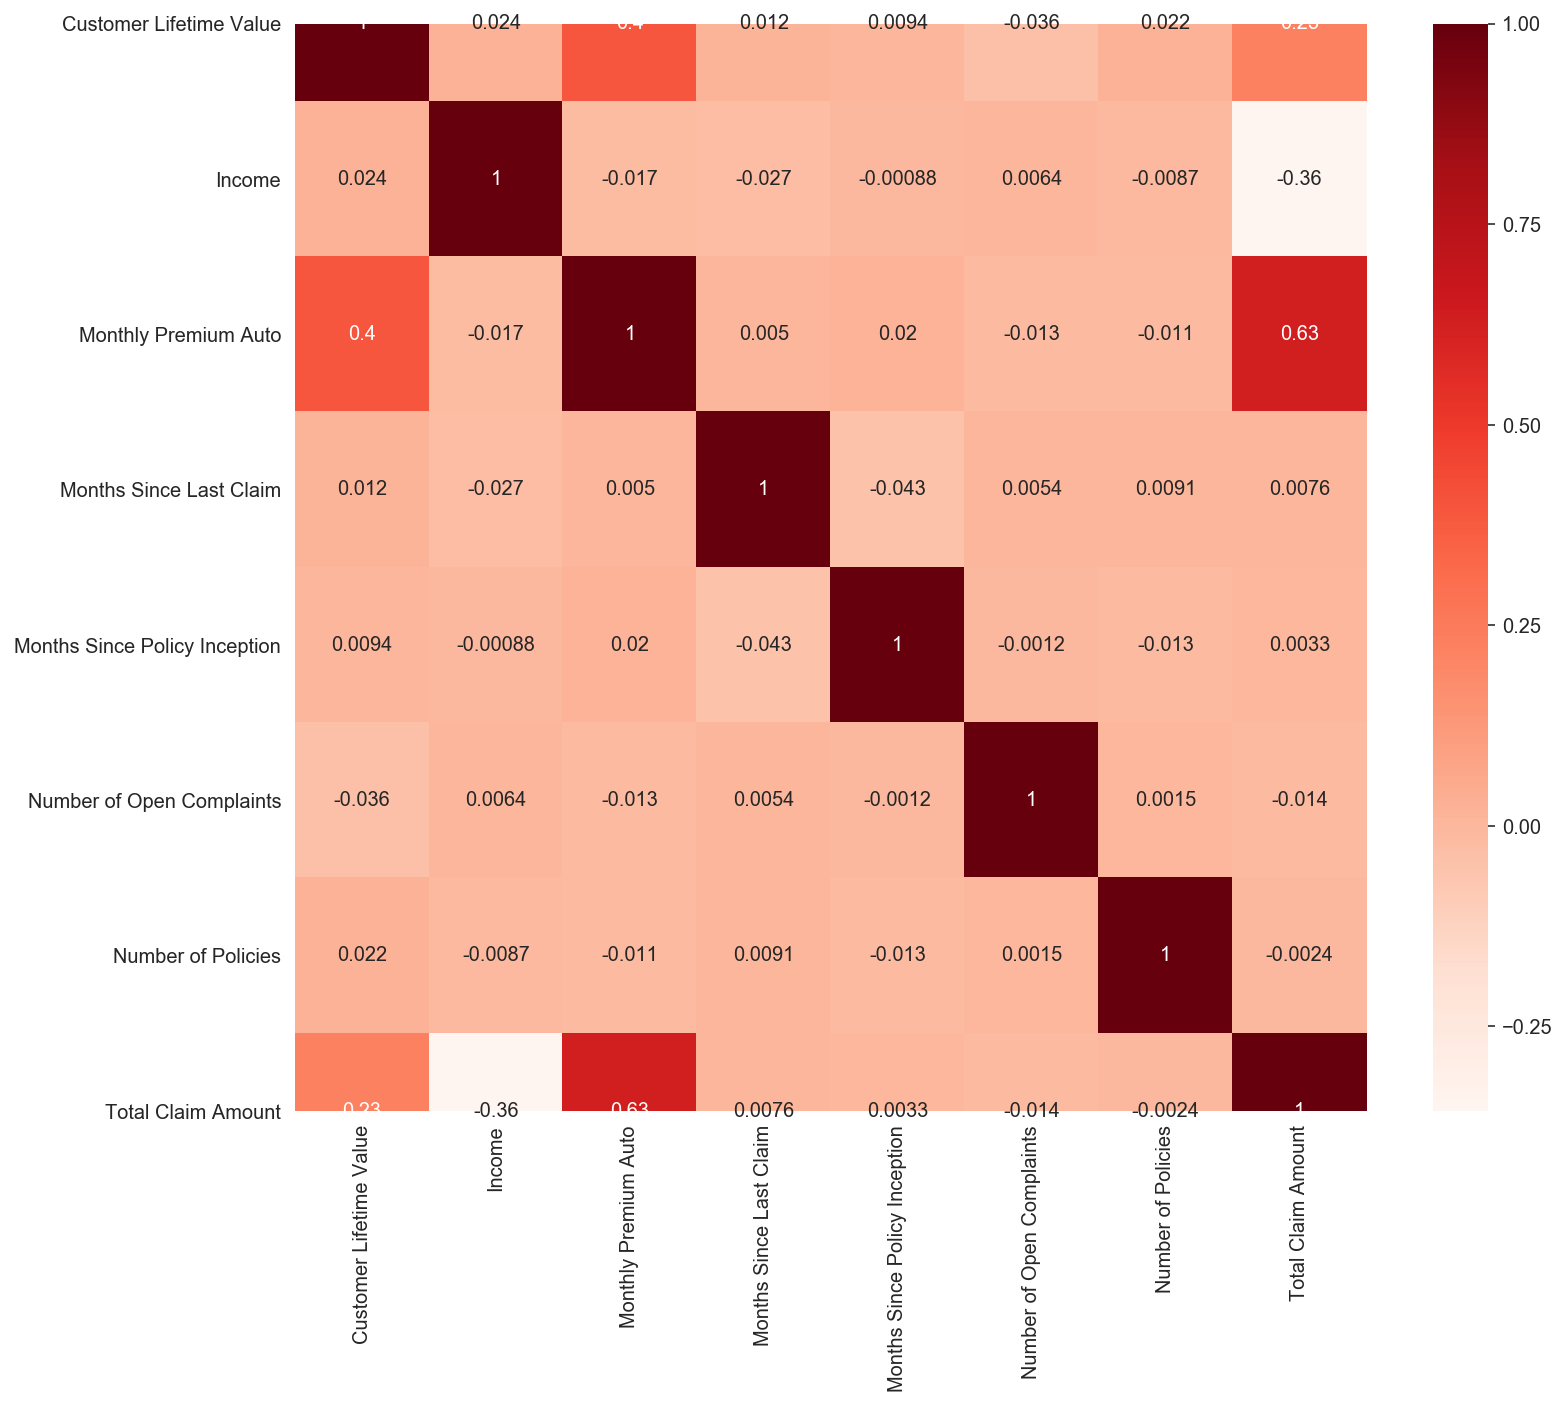

In [153]:
plt.figure(figsize=(12,10))
cor = market.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [154]:
#Correlation with output variable
#cor_target = abs(market['Customer Lifetime Value'])
#Selecting highly correlated features
#relevant_features = cor_target[cor_target>0.5]
#relevant_features

None of the features are relevant in terms of pearson's correlation matrix as the values are <0.5 for all features w.r.t CLV.

### FORWARD SELECTION :

##### Note randomly the value of k_features is taken as 10, we can take any value < total number of features. But remember that it should not be too low, as becuase if the value of features is too low, then it can pollute the subset.

In [155]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

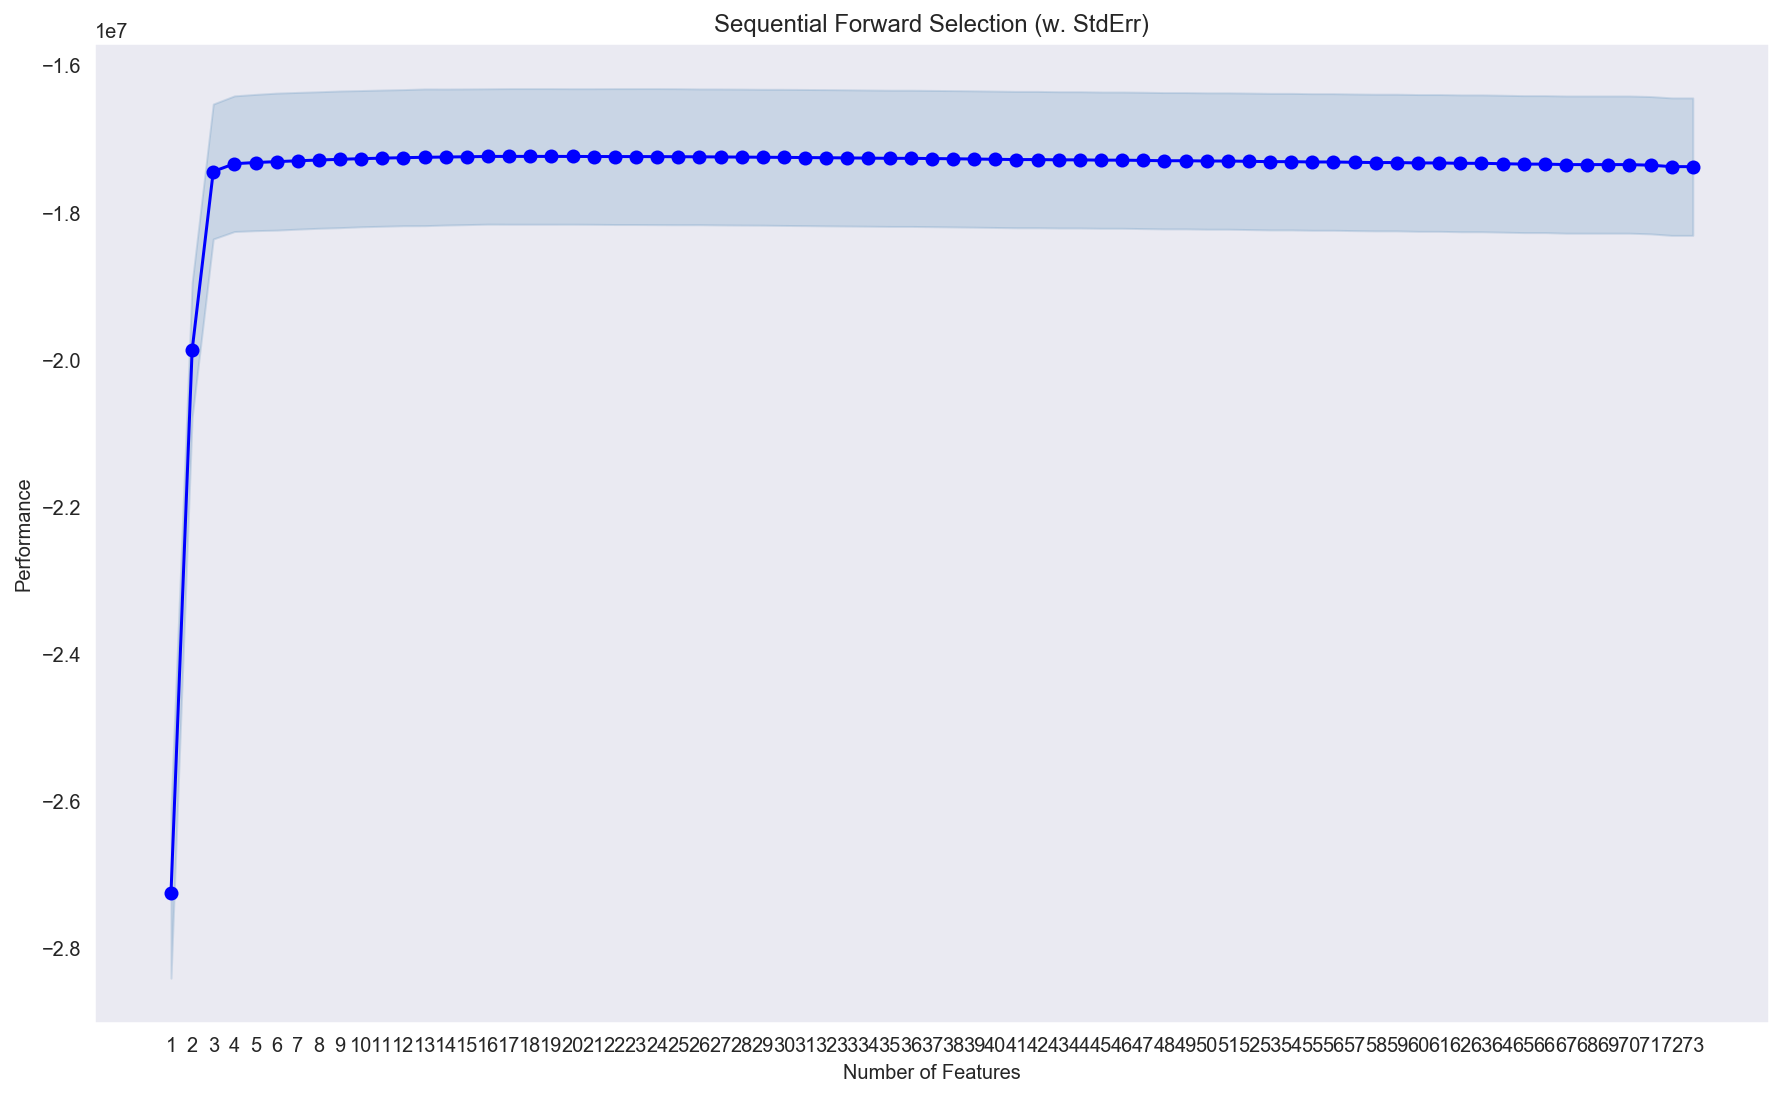

In [156]:
sfs = sfs(lr, k_features='best', forward=True, floating=False, 
          scoring='neg_mean_squared_error', cv=20)
model = sfs.fit(market_dummies.drop('Customer Lifetime Value', axis=1),market_dummies['Customer Lifetime Value'])
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [157]:
sfs.k_feature_idx_

(1, 9, 14, 15, 16, 21, 22, 25, 26, 32, 36, 37, 38, 39, 40, 41, 58, 65, 66)

### BACKWARD ELIMINATION :

In [158]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model3 = sm.OLS(y,X_1).fit()
print(model3.pvalues>0.05)

const                             True
Income                            True
Monthly Premium Auto             False
Months Since Last Claim           True
Months Since Policy Inception     True
                                 ...  
Vehicle Size_Large                True
Vehicle Size_Medsize              True
Vehicle Size_Small                True
Months_1                          True
Months_2                          True
Length: 74, dtype: bool


In [159]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Monthly Premium Auto', 'EmploymentStatus_Employed', 'EmploymentStatus_Medical Leave', 'Gender_F', 'Number of Open Complaints_0', 'Number of Open Complaints_1', 'Number of Open Complaints_2', 'Number of Policies_1', 'Number of Policies_2', 'Number of Policies_3', 'Vehicle Class_Four-Door Car', 'Vehicle Class_Two-Door Car']


## FINAL LINEAR MODEL :


## FINAL SELECTED FEATURES FOR MODEL BUILDING BASED ON STATISTICAL TESTS, EDA & VIF : (WITH OUTLIERS)

In [160]:
market_dummies.columns.T

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Total Claim Amount', 'State_Arizona', 'State_California',
       'State_Nevada', 'State_Oregon', 'State_Washington', 'Response_No',
       'Response_Yes', 'Coverage_Basic', 'Coverage_Extended',
       'Coverage_Premium', 'Education_Bachelor', 'Education_College',
       'Education_Doctor', 'Education_High School or Below',
       'Education_Master', 'EmploymentStatus_Disabled',
       'EmploymentStatus_Employed', 'EmploymentStatus_Medical Leave',
       'EmploymentStatus_Retired', 'EmploymentStatus_Unemployed', 'Gender_F',
       'Gender_M', 'Location Code_Rural', 'Location Code_Suburban',
       'Location Code_Urban', 'Marital Status_Divorced',
       'Marital Status_Married', 'Marital Status_Single',
       'Number of Open Complaints_0', 'Number of Open Complaints_1',
       'Number of Open Complaints_2', 'Number of Open Complaints_3',
       

In [161]:
final_with_outliers = pd.DataFrame(columns=['Marital Status_Single',
                     'Renew Offer Type_Offer2',
                    'Renew Offer Type_Offer1',
                    'Renew Offer Type_Offer4',
                    'Vehicle Class_Four-Door Car',
                    'Vehicle Class_Luxury Car', 
                    'Vehicle Class_Luxury SUV',
                    'Vehicle Class_SUV', 
                    'Vehicle Class_Sports Car',
                    'Vehicle Class_Two-Door Car',
                    'Coverage_Basic',
                    'Coverage_Extended',
                    'Coverage_Premium',
                    'Vehicle Size_Large',
                    'EmploymentStatus_Disabled',
                    'EmploymentStatus_Employed', 
                    'EmploymentStatus_Medical Leave',
                    'EmploymentStatus_Retired', 
                    'EmploymentStatus_Unemployed',
                    'Number of Policies_1', 
                    'Number of Policies_2', 
                    'Number of Policies_3',
                    'Income',
                    'Months Since Last Claim',
                    'Months Since Policy Inception','Total Claim Amount','Customer Lifetime Value'],data=market_dummies)

In [162]:
final_with_outliers.shape

(9134, 27)

In [163]:
X = final_with_outliers.drop('Customer Lifetime Value',axis=1)
y = final_with_outliers['Customer Lifetime Value']
print(X.shape)
print(y.shape)

(9134, 26)
(9134,)


In [164]:
## BASE MODEL 3 :
X_sm = X
X_sm = sm.add_constant(X_sm)
lm = sm.OLS(y,X_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.630
Model:                                 OLS   Adj. R-squared:                  0.629
Method:                      Least Squares   F-statistic:                     706.1
Date:                     Tue, 26 May 2020   Prob (F-statistic):               0.00
Time:                             20:06:48   Log-Likelihood:                -89115.
No. Observations:                     9134   AIC:                         1.783e+05
Df Residuals:                         9111   BIC:                         1.784e+05
Df Model:                               22                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           6183.8537    131.225     47.124      0.000    5926.624    6441.084
Marital Status_Single           -276.0885    110.213     -2.505      0.012    -492.131     -60.046
Renew Offer Type_Offer2           27.9128    135.550      0.206      0.837    -237.795     293.621
Renew Offer Type_Offer1         -107.5380    131.583     -0.817      0.414    -365.470     150.394
Renew Offer Type_Offer4          -57.9741    172.039     -0.337      0.736    -395.208     279.260
Vehicle Class_Four-Door Car    -3721.5516    110.019    -33.826      0.000   -3937.214   -3505.889
Vehicle Class_Luxury Car        6496.9220    306.910     21.169      0.000    5895.310    7098.534
Vehicle Class_Luxury SUV        6792.0850    288.496     23.543      0.000    6226.568    7357.602
Vehicle Class_SUV                -51.9988    114.848     -0.453      0.651    -277.127     173.129
Vehicle Class_Sports Car         379.9447    177.826      2.137      0.033      31.366     728.523
Vehicle Class_Two-Door Car     -3711.5476    126.227    -29.404      0.000   -3958.981   -3464.114
Coverage_Basic                   411.7878     69.005      5.967      0.000     276.522     547.053
Coverage_Extended               2012.8752     81.912     24.573      0.000    1852.308    2173.442
Coverage_Premium                3759.1908    129.071     29.125      0.000    3506.184    4012.198
Vehicle Size_Large               -66.2334    143.974     -0.460      0.646    -348.455     215.988
EmploymentStatus_Disabled       1046.6159    182.726      5.728      0.000     688.432    1404.800
EmploymentStatus_Employed       1714.8740    122.956     13.947      0.000    1473.853    1955.894
EmploymentStatus_Medical Leave  1534.3024    178.439      8.598      0.000    1184.522    1884.083
EmploymentStatus_Retired         870.0373    214.233      4.061      0.000     450.092    1289.983
EmploymentStatus_Unemployed     1018.0241    122.966      8.279      0.000     776.982    1259.066
Number of Policies_1           -3217.4958     75.333    -42.710      0.000   -3365.166   -3069.826
Number of Policies_2            8997.8862     81.311    110.660      0.000    8838.498    9157.274
Number of Policies_3             403.4633     74.352      5.426      0.000     257.717     549.210
Income                             0.0008      0.003      0.332      0.740      -0.004       0.006
Months Since Last Claim            7.6058      4.356      1.746      0.081      -0.932      16.144
Months Since Policy Inception      2.1238      1.583      1.342      0.180      -0.979       5.227
Total Claim Amount                 0.3240      0.222      1.459      0.145      -0.111       0.759
==========================================================

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1) # Splitting the data in 70 and 30 ratio
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6393, 26)
(2741, 26)
(6393,)
(2741,)


## LINEAR REGRESSION :

In [166]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)
print('r2 score for train :',lr.score(X_train,y_train)) # r2 scores of train
print('r2 score for test :',lr.score(X_test,y_test))  #r2 scores of test

r2 score for train : 0.6314263519926601
r2 score for test : 0.6246803654302755


## NON LINEAR MODELS


In [167]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [168]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [169]:
metrics = [r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error]

In [170]:
# Creating object instances:
abr = AdaBoostRegressor()
dt = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
br = BaggingRegressor()

### 1)DECISION TREE :

In [171]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [172]:
y_pred_dt = dt.predict(X_test)

In [173]:
r2 = []
mae = []
mape = []
mse = []

In [174]:
for i in metrics:
    print(i(y_test,y_pred_dt))
    if i == r2_score:
        r2.append(i(y_test,y_pred_dt))
    elif i == mean_absolute_error:
        mae.append(i(y_test,y_pred_dt))
    elif i == mean_absolute_percentage_error:
        mape.append(i(y_test,y_pred_dt))
    else:
        mse.append(i(y_test,y_pred_dt))

0.3150860842757006
1878.8891949846775
15.491444540609542
28724117.129939906


### 2)RANDOM FOREST :

In [175]:
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

In [176]:
for i in metrics:
    print(i(y_test,y_pred_rfr))
    if i == r2_score:
        r2.append(i(y_test,y_pred_rfr))
    elif i == mean_absolute_error:
        mae.append(i(y_test,y_pred_rfr))
    elif i == mean_absolute_percentage_error:
        mape.append(i(y_test,y_pred_rfr))
    else:
        mse.append(i(y_test,y_pred_rfr))

0.6548401135622746
1587.032410997983
13.550847320569016
14475414.762320088


### 3) GRADIENT BOOSTING REGRESSOR :

In [177]:
hyper_params_gbr = {'loss':['ls','lad','huber'],'learning_rate':[0.1,0.01,1],'n_estimators':[100,150]}

In [178]:
model = GridSearchCV(gbr,param_grid=hyper_params_gbr)

In [179]:
model.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
              

In [180]:
model.score(X_test,y_test)

0.6685518016468717

In [181]:
model.score(X_train,y_train)

0.7466217166810112

In [182]:
model.best_params_

{'learning_rate': 0.1, 'loss': 'ls', 'n_estimators': 100}

In [183]:
gbr.fit(X_train,y_train)
y_pred_gbr = gbr.predict(X_test)
for i in metrics:
    print(i(y_test,y_pred_gbr))
    if i == r2_score:
        r2.append(i(y_test,y_pred_gbr))
    elif i == mean_absolute_error:
        mae.append(i(y_test,y_pred_gbr))
    elif i == mean_absolute_percentage_error:
        mape.append(i(y_test,y_pred_gbr))
    else:
        mse.append(i(y_test,y_pred_gbr))

0.6684744935522776
1805.0933788127059
16.35633679142069
13903612.206063366


### 4) ADA BOOSTING :

In [184]:
abr.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [185]:
y_pred_abr = abr.predict(X_test)

In [186]:
for i in metrics:
    print(i(y_test,y_pred_abr))
    if i == r2_score:
        r2.append(i(y_test,y_pred_abr))
    elif i == mean_absolute_error:
        mae.append(i(y_test,y_pred_abr))
    elif i == mean_absolute_percentage_error:
        mape.append(i(y_test,y_pred_abr))
    else:
        mse.append(i(y_test,y_pred_abr))

0.36629349868809624
3618.468005649535
56.15596979552476
26576565.830814153


### 5) BAGGING + BOOSTING :

In [187]:
gbr2 = GradientBoostingRegressor()
br2 = BaggingRegressor(gbr2)

#### FINDING THE BEST SAMPLE

In [188]:
temp = 0
for j in range(1,100,5):
    NXT,NXt,NYT,NYt = train_test_split(X,y,test_size=0.3,random_state=j)
    br2.fit(NXT,NYT)
    test_score = br2.score(NXt,NYt)
    train_score = br2.score(NXT,NYT)
    if test_score>temp:
        temp = test_score
        print(j,train_score,temp)

1 0.7426208638465938 0.6714868614077243
6 0.7425148592866151 0.6756602971988587
11 0.7279465786948176 0.686337561793539
16 0.7240062611443739 0.6890093701735155
21 0.7272988954741422 0.6978769322810376


In [189]:
br2.fit(X_train,y_train)
y_pred_br2 = br2.predict(X_test)
for i in metrics:
    print(i(y_test,y_pred_br2))
    if i == r2_score:
        r2.append(i(y_test,y_pred_br2))
    elif i == mean_absolute_error:
        mae.append(i(y_test,y_pred_br2))
    elif i == mean_absolute_percentage_error:
        mape.append(i(y_test,y_pred_br2))
    else:
        mse.append(i(y_test,y_pred_br2))

0.6731166786787812
1794.4918480672052
16.192049427581523
13708926.90875627


## BAGGING+BOOSTING with K FOLD CROSS VALIDATION :

In [190]:
test_scores = []
train_scores = []
cv = KFold(n_splits=10,random_state=42, shuffle=False)
for train_index,test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    br2.fit(X_train,y_train)
    test_scores.append(br2.score(X_test, y_test))
    train_scores.append(br2.score(X_train, y_train))

In [191]:
np.mean(train_scores)

0.7277460217244964

In [192]:
np.mean(test_scores)

0.683683917022664

INFERENCE :
We can see that after using KFold validation we got our average training accuracy to be 72.71 and average testing accuracy to be 68.31, OUR final model is bagging regressor with base estimator gradient boosting regressor. 

### CREATING A DATA FRAME for train and test score for all models:

In [193]:
train = []
test = []

### 1) LINEAR REGRESSION :

In [194]:
test.append(lr.score(X_test,y_test))
train.append(lr.score(X_train,y_train))

### 2) DECISION TREE :

In [195]:
train.append(dt.score(X_train,y_train))
test.append(dt.score(X_test,y_test))

In [196]:
train

[0.6290223172296627, 0.8236716541916017]

### 3) ADA-BOOST REGRESSOR :

In [197]:
train.append(abr.score(X_train,y_train))
test.append(abr.score(X_test,y_test))

### 4) RANDOM FOREST :

In [198]:
train.append(rfr.score(X_train,y_train))
test.append(rfr.score(X_test,y_test))

### 5) BAGGING+BOOSTING :

In [199]:
train.append(br2.score(X_train,y_train))
test.append(br2.score(X_test,y_test))

In [200]:
print(train)
print(test)
print(r2)
print(mae)
print(mape)
print(mse)

[0.6290223172296627, 0.8236716541916017, 0.4664135265769824, 0.8763957969056622, 0.7290430314892836]
[0.6354288353963866, 0.7646761561479098, 0.47067773559831577, 0.8624812175529141, 0.6905688214114619]
[0.3150860842757006, 0.6548401135622746, 0.6684744935522776, 0.36629349868809624, 0.6731166786787812]
[1878.8891949846775, 1587.032410997983, 1805.0933788127059, 3618.468005649535, 1794.4918480672052]
[15.491444540609542, 13.550847320569016, 16.35633679142069, 56.15596979552476, 16.192049427581523]
[28724117.129939906, 14475414.762320088, 13903612.206063366, 26576565.830814153, 13708926.90875627]


Bagging Boosting method has higher accuracy on both Training and Testing Models.

Both Linear and Final Model are in the end good models to work on while Linear Model is the Fastest Working Model. 
  